# **Non Homogeneous Hidden Markov Model**

In [1]:
# Importar librerías necesarias
import pandas as pd
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

# Habilitar conversión entre pandas y R
pandas2ri.activate()

: 

In [1]:
from rpy2.robjects.packages import importr

# Cargar el paquete base de R
base = importr('base')

: 

In [3]:
# Verificar conexión con R e intentar cargar un paquete
utils = importr('utils')  # Librería para gestionar paquetes en R

try:
    depmixS4 = importr('depmixS4')  # Intentar cargar depmixS4
    print("El paquete 'depmixS4' se cargó correctamente.")
except:
    print("El paquete 'depmixS4' no está instalado. Procediendo a instalar...")
    utils.install_packages('depmixS4')
    depmixS4 = importr('depmixS4')
    print("El paquete 'depmixS4' se instaló y cargó correctamente.")

El paquete 'depmixS4' se cargó correctamente.


## Library Loading and Configuration

In [1]:
import os
os.environ["R_HOME"] = r"C:\Program Files\R\R-4.5.0"  # Change this path according to your R installation.

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

import seaborn as sns
import numpy as np
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import IntVector

# Enable conversion between pandas and R
pandas2ri.activate()

# Load the R base package
base = importr('base')
# Load the package depmixS4
depmixS4 = importr("depmixS4")
# Set the seed in R for reproducibility
r('set.seed(2030)')
# Set seed in Python for reproducibility
np.random.seed(2030)

## Data loading and preparation:

In [3]:
covid_data = pd.read_excel('/Users/constanzaneiraurrutia/Desktop/ESCRITORIO/MAGÍSTER DATA SCIENCE/PUBLICACIÓN TESIS/ANÁLISIS DE DATOS/covid_data.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/constanzaneiraurrutia/Desktop/ESCRITORIO/MAGÍSTER DATA SCIENCE/PUBLICACIÓN TESIS/ANÁLISIS DE DATOS/covid_data.xlsx'

In [6]:
covid_data.columns

Index(['IM_interno', 'IM_externo', 'inc_pc_comuna', 'TasaCasosAcumulados',
       'Personas_hogar_promedio', 'inmigrantes', 'total_hog_hacinados',
       'indic_precariedad_vivienda', 'Comuna', 'fecha', 'dias', 'por_educ_sup',
       'porc_postgrado', 'IPS_2020', 'Prioridad_2020', 'CODIGO', 'year',
       'month', 'paso', 'paso_etiqueta', 'Fecha inicio cuarentena',
       'Fecha término cuarentena', 'Casos_Diarios_Brutos',
       'Casos_Diarios_Brutos_MM7'],
      dtype='object')

In [7]:
covid_data.rename(columns={'IM_interno': 'Internal_Mobility_Index',
                           'IM_externo': 'External_Mobility_Index',
                           'inc_pc_comuna': 'Per_Capita_Income',
                           'TasaCasosAcumulados': 'Cumulative_Cases_Rate',
                           'Personas_hogar_promedio': 'Average_Household_Persons',
                           'inmigrantes': 'Inmigrants',
                           'total_hog_hacinados': 'Total_Households_Housed',
                           'indic_precariedad_vivienda': 'Housing_Precariousness_Index',
                           'Comuna': 'Commune',
                           'fecha': 'Date',
                           'dias': 'Days',
                           'por_educ_sup': 'Higher_Education_Percentage',
                           'porc_postgrado': 'Postgraduade_Percentage',
                           'IPS_2020': 'Social_Priority_Index_2020',
                           'Prioridad_2020': 'Priority_2020',
                           'CODIGO':'Code',
                           'year': 'Year',
                           'month': 'Month',
                           'paso': 'Step',
                           'paso_etiqueta': 'Step_Label',
                           'Fecha inicio cuarentena': 'Quarantine_Start_Date',
                           'Fecha término cuarentena': 'Quarantine_End_Date',
                           'Casos_Diarios_Brutos': 'Gross_Daily_Cases',
                           'Casos_Diarios_Brutos_MM7': 'Gross_Daily_Cases_Mobile_Average_7_Days'}, inplace=True)

In [8]:
covid_data.columns

Index(['Internal_Mobility_Index', 'External_Mobility_Index',
       'Per_Capita_Income', 'Cumulative_Cases_Rate',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Commune', 'Date', 'Days',
       'Higher_Education_Percentage', 'Postgraduade_Percentage',
       'Social_Priority_Index_2020', 'Priority_2020', 'Code', 'Year', 'Month',
       'Step', 'Step_Label', 'Quarantine_Start_Date', 'Quarantine_End_Date',
       'Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days'],
      dtype='object')

### Dictionary of variables:
- **'Internal_Mobility_Index'**: Index of internal mobility of the communes.
- **'External_Mobility_Index'**: Index of external mobility of the communes.
- **'Per_Capita_Income'**: Per capita income of the communes.
- **'Cumulative_Cases_Rate'**: Cumulative case rate per 100,000 population.
- **'Average_Household_Persons'**: Average number of persons per household in the communes.
- **'Inmigrants'**: Percentage of immigrants in the communes.
- **'Total_Households_Housed'**: Percentage of overcrowded households in the communes.
- **'Housing_Precariousness_Index'**: Indicator of housing precariousness in the municipalities.
- **'Commune'**: Name of the commune.
- **'Date'**: Date of observation.
- **'Days'**: Number of days since the beginning of the records.
- **'Higher_Education_Percentage'**: Percentage of people with higher education in the communes.
- **'Postgraduade_Percentage'**: Percentage of people with a postgraduate degree in the communes.
- **'Social_Priority_Index_2020'**: Social Priority Index 2020 of the communes.
- **'Priority_2020'**: 2020 Social Priority of the communes.
- **'Code'**: Code of the commune.
- **'Year'**: Year of observation.
- **'Month'**: Month of observation.
- **'Step'**: Commune Step by Step Plan.
- **'Step_Label'**: Label of the commune's passage in the Step by Step Plan.
- **'Quarantine_Start_Date'**: Quarantine start date.
- **'Quarantine_End_Date'**: Date of end of quarantine.
- **'Gross_Daily_Cases'**: Number of gross daily cases.
- **'Gross_Daily_Cases_Mobile_Average_7_Days'**: Number of gross daily cases with 7-day moving average.

In [9]:
# Remove rows with null values in the relevant columns:
covid_data = covid_data.dropna(subset=['Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days', 'Date'])
# Reset index and add row_id for merge:
covid_data = covid_data.reset_index(drop=True)
covid_data['row_id'] = covid_data.index  # for subsequent merge

### Urban Quality

In [10]:
urban_quality= pd.read_csv('/Users/constanzaneiraurrutia/Desktop/ESCRITORIO/MAGÍSTER DATA SCIENCE/PUBLICACIÓN TESIS/ANÁLISIS DE DATOS/covid_data_urban_quality.csv')

In [11]:
print(urban_quality.columns)

Index(['Internal_Mobility_Index', 'External_Mobility_Index',
       'Per_Capita_Income', 'Cumulative_Cases_Rate',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Commune', 'Date', 'Days',
       'Higher_Education_Percentage', 'Postgraduade_Percentage',
       'Social_Priority_Index_2020', 'Priority_2020', 'Code', 'Year', 'Month',
       'Step', 'Step_Label', 'Quarantine_Start_Date', 'Quarantine_End_Date',
       'Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days',
       'Connectivity_and_Mobility', 'Housing_and_Environment',
       'Labor_Conditions', 'Business_Environment', 'Health_and_Environment',
       'Socio_cultural_conditions', 'Urban_Quality_of_Life_Index_2024'],
      dtype='object')


In [12]:
covid_data = pd.read_csv('/Users/constanzaneiraurrutia/Desktop/ESCRITORIO/MAGÍSTER DATA SCIENCE/PUBLICACIÓN TESIS/ANÁLISIS DE DATOS/covid_data_urban_quality.csv')

In [13]:
covid_data.columns

Index(['Internal_Mobility_Index', 'External_Mobility_Index',
       'Per_Capita_Income', 'Cumulative_Cases_Rate',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Commune', 'Date', 'Days',
       'Higher_Education_Percentage', 'Postgraduade_Percentage',
       'Social_Priority_Index_2020', 'Priority_2020', 'Code', 'Year', 'Month',
       'Step', 'Step_Label', 'Quarantine_Start_Date', 'Quarantine_End_Date',
       'Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days',
       'Connectivity_and_Mobility', 'Housing_and_Environment',
       'Labor_Conditions', 'Business_Environment', 'Health_and_Environment',
       'Socio_cultural_conditions', 'Urban_Quality_of_Life_Index_2024'],
      dtype='object')

In [14]:
# Remove rows with null values in the relevant columns:
covid_data = covid_data.dropna(subset=['Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days', 'Date'])
# Reset index and add row_id for merge:
covid_data = covid_data.reset_index(drop=True)
covid_data['row_id'] = covid_data.index  # for subsequent merge

## Exploratory Data Analysis (EDA):

### Gross Daily Cases with 7-day moving average:

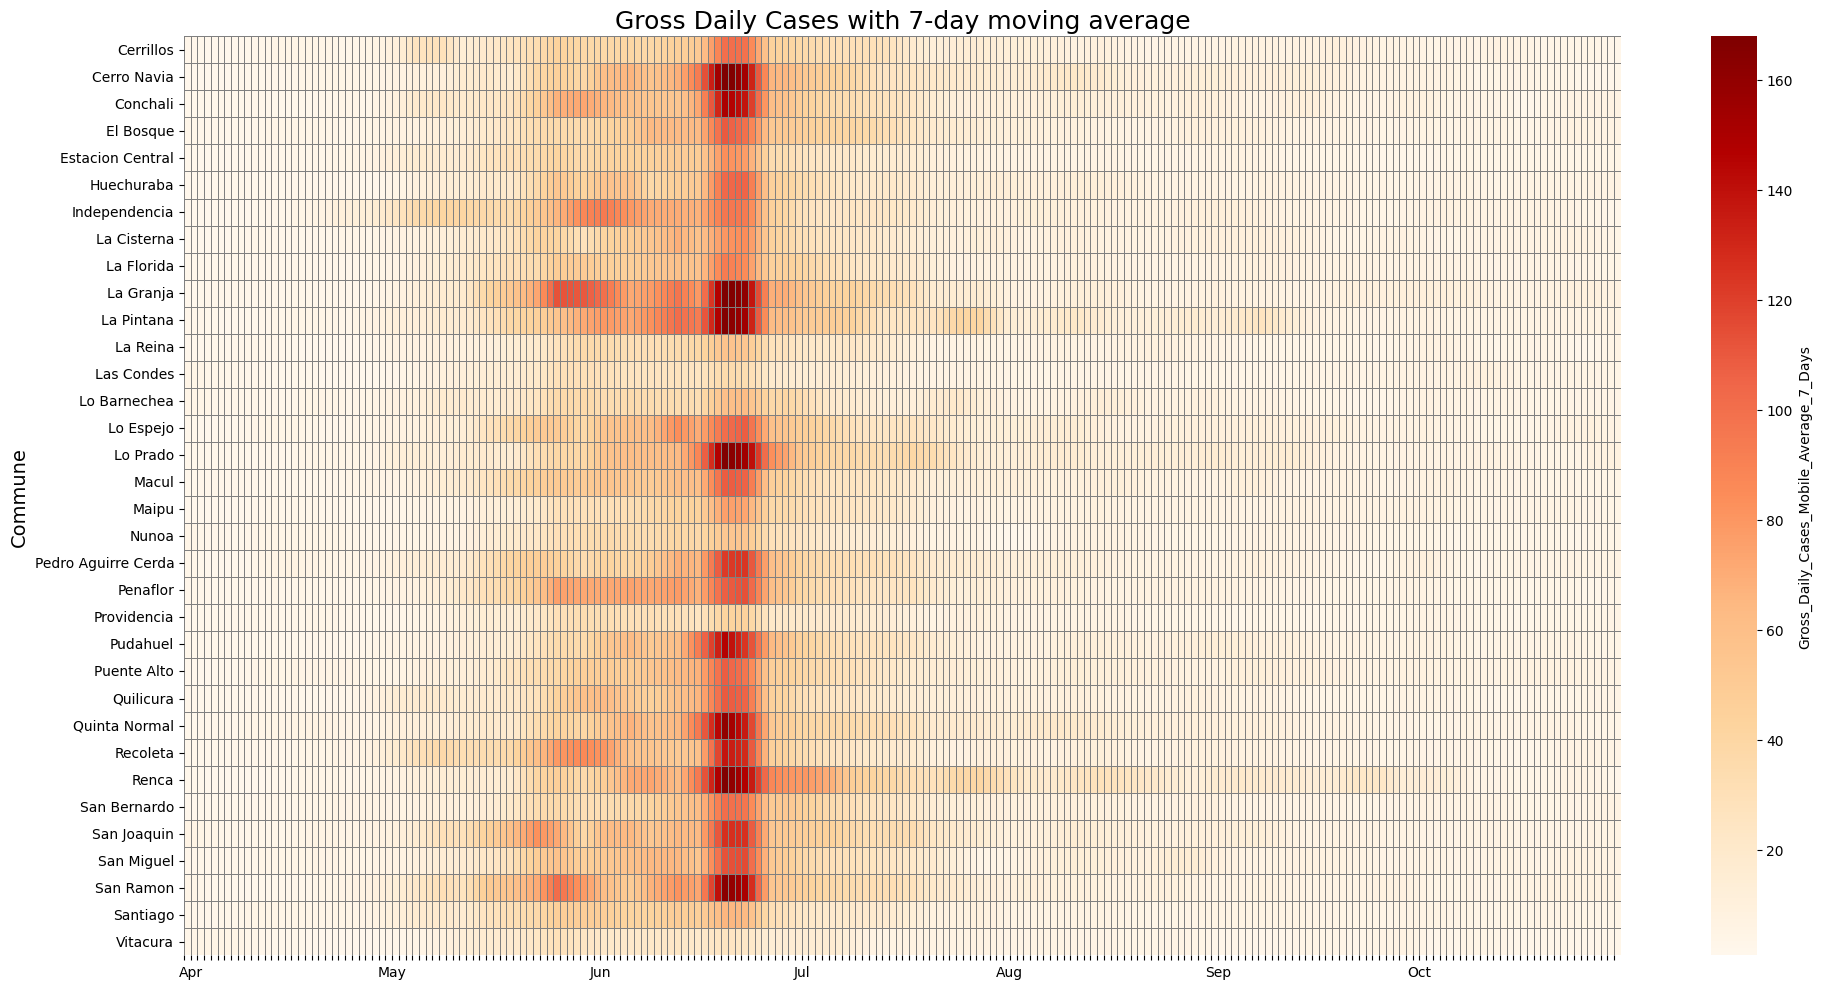

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir rango de fechas
min_date = pd.Timestamp('2020-03-31')
max_date = pd.Timestamp('2020-10-30')

covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Paso 1: Convertir 'Days' a datetime si no lo es
if not pd.api.types.is_datetime64_any_dtype(covid_data['Days']):
    reference_date = covid_data['Date'].min()
    covid_data['Days'] = reference_date + pd.to_timedelta(covid_data['Days'], unit='D')


# Paso 2: Crear la tabla pivot
covid_pivot = covid_data.pivot(index='Commune', columns='Date', values='Gross_Daily_Cases_Mobile_Average_7_Days')

# Paso 3: Filtrar fechas

filtered_columns = [col for col in covid_pivot.columns if min_date <= col <= max_date]
covid_pivot = covid_pivot[filtered_columns]

# Valores mínimos y máximos personalizados para mejorar contraste
vmin = covid_pivot.quantile(0.05).min()  # mínimo más robusto
vmax = covid_pivot.quantile(0.95).max()  # máximo más robusto

# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    covid_pivot,
    cmap='OrRd',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Gross_Daily_Cases_Mobile_Average_7_Days'},
    vmin=vmin,  # limitar escala inferior
    vmax=vmax,  # limitar escala superior
    ax=ax
)


# Etiquetas de ejes
ax.set_xlabel(None)
ax.set_ylabel("Commune", fontsize=14)

# Mostrar etiquetas solo para primeros días del mes
tick_positions = list(range(len(filtered_columns)))
tick_labels = [
    date.strftime('%b') if date.day == 1 else ''
    for date in filtered_columns
]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=0, fontsize=10)

plt.title('Gross Daily Cases with 7-day moving average', fontsize=18)
plt.tight_layout()
plt.show()


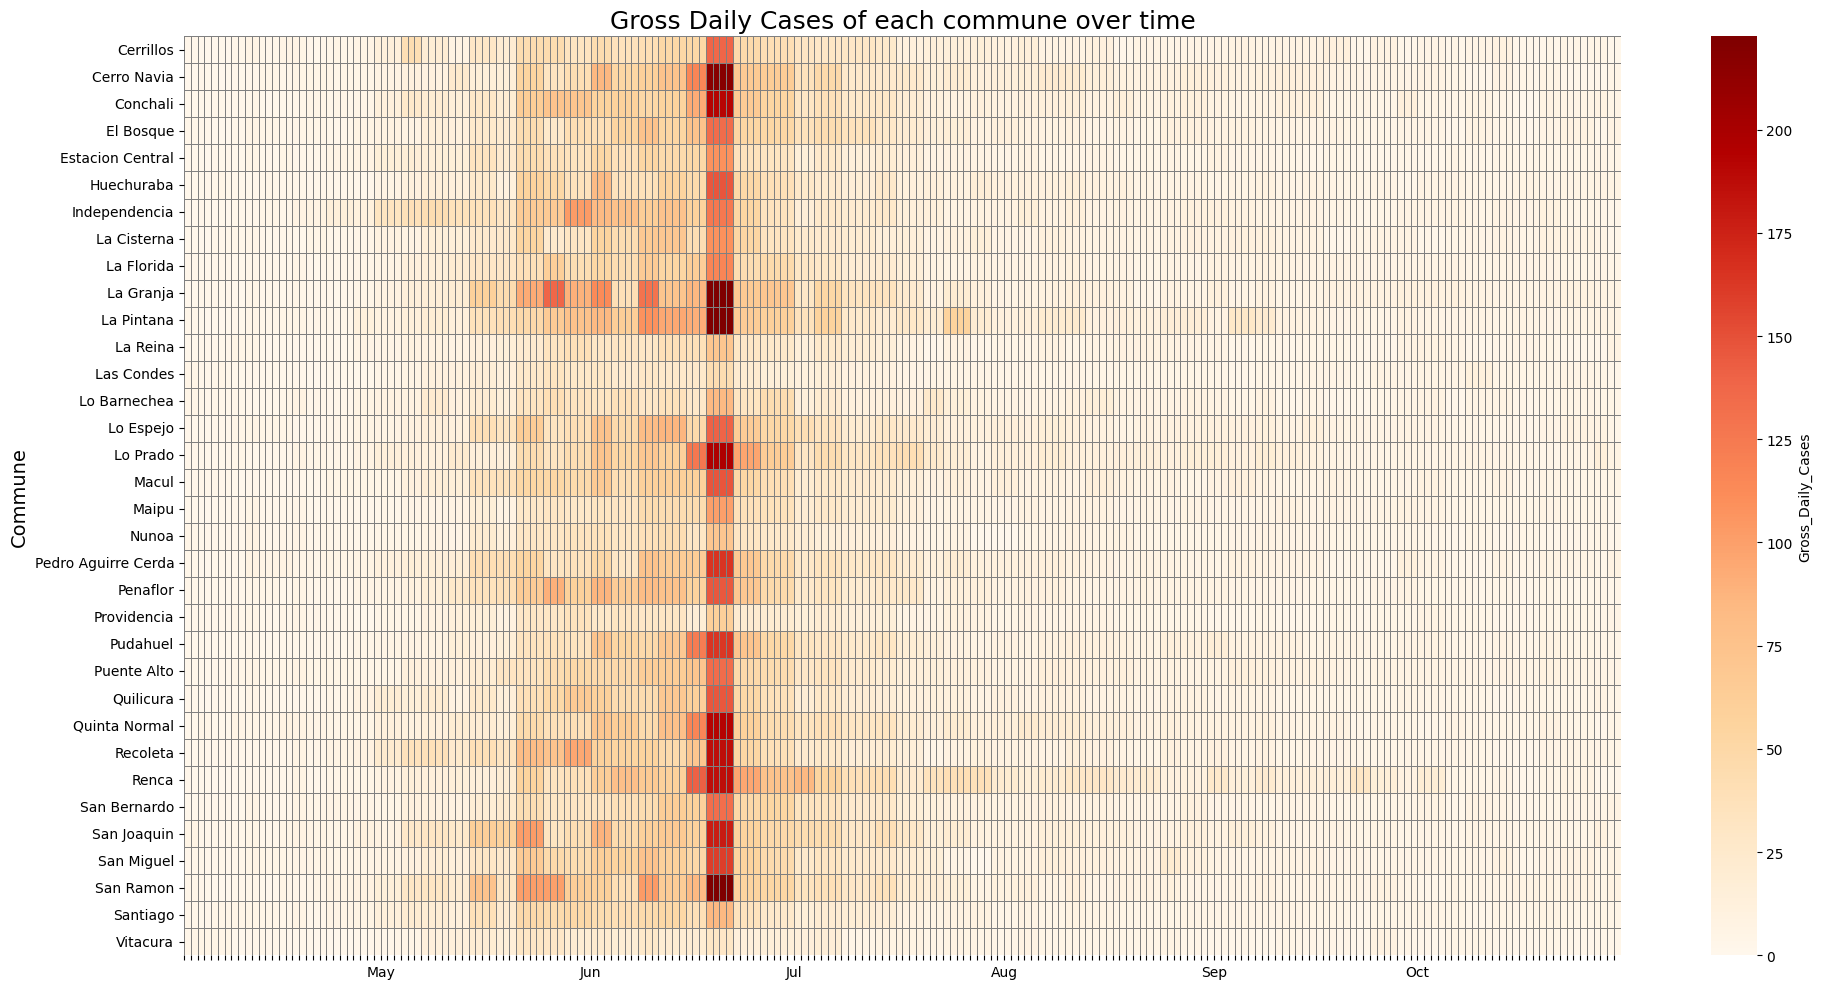

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir rango de fechas
min_date = pd.Timestamp('2020-03-31')
max_date = pd.Timestamp('2020-10-30')

# Crear tabla pivot
covid_pivot = covid_data.pivot(index='Commune', columns='Days', values='Gross_Daily_Cases')

# Filtrar por rango de fechas
filtered_columns = [col for col in covid_pivot.columns if min_date <= col <= max_date]
covid_pivot = covid_pivot[filtered_columns]

# Valores mínimos y máximos personalizados para mejorar contraste
vmin = covid_pivot.quantile(0.05).min()  # mínimo más robusto
vmax = covid_pivot.quantile(0.95).max()  # máximo más robusto

# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    covid_pivot,
    cmap='OrRd',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Gross_Daily_Cases'},
    vmin=vmin,  # limitar escala inferior
    vmax=vmax,  # limitar escala superior
    ax=ax
)

# Etiquetas
ax.set_xlabel(None)
ax.set_ylabel("Commune", fontsize=14)

tick_positions = list(range(len(filtered_columns)))
tick_labels = [
    date.strftime('%b') if date.day == 1 else ''
    for date in filtered_columns
]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=0, fontsize=10)

# Título
plt.title('Gross Daily Cases of each commune over time', fontsize=18)

plt.tight_layout()
plt.show()

### Internal Mobility Index of each commune over time:

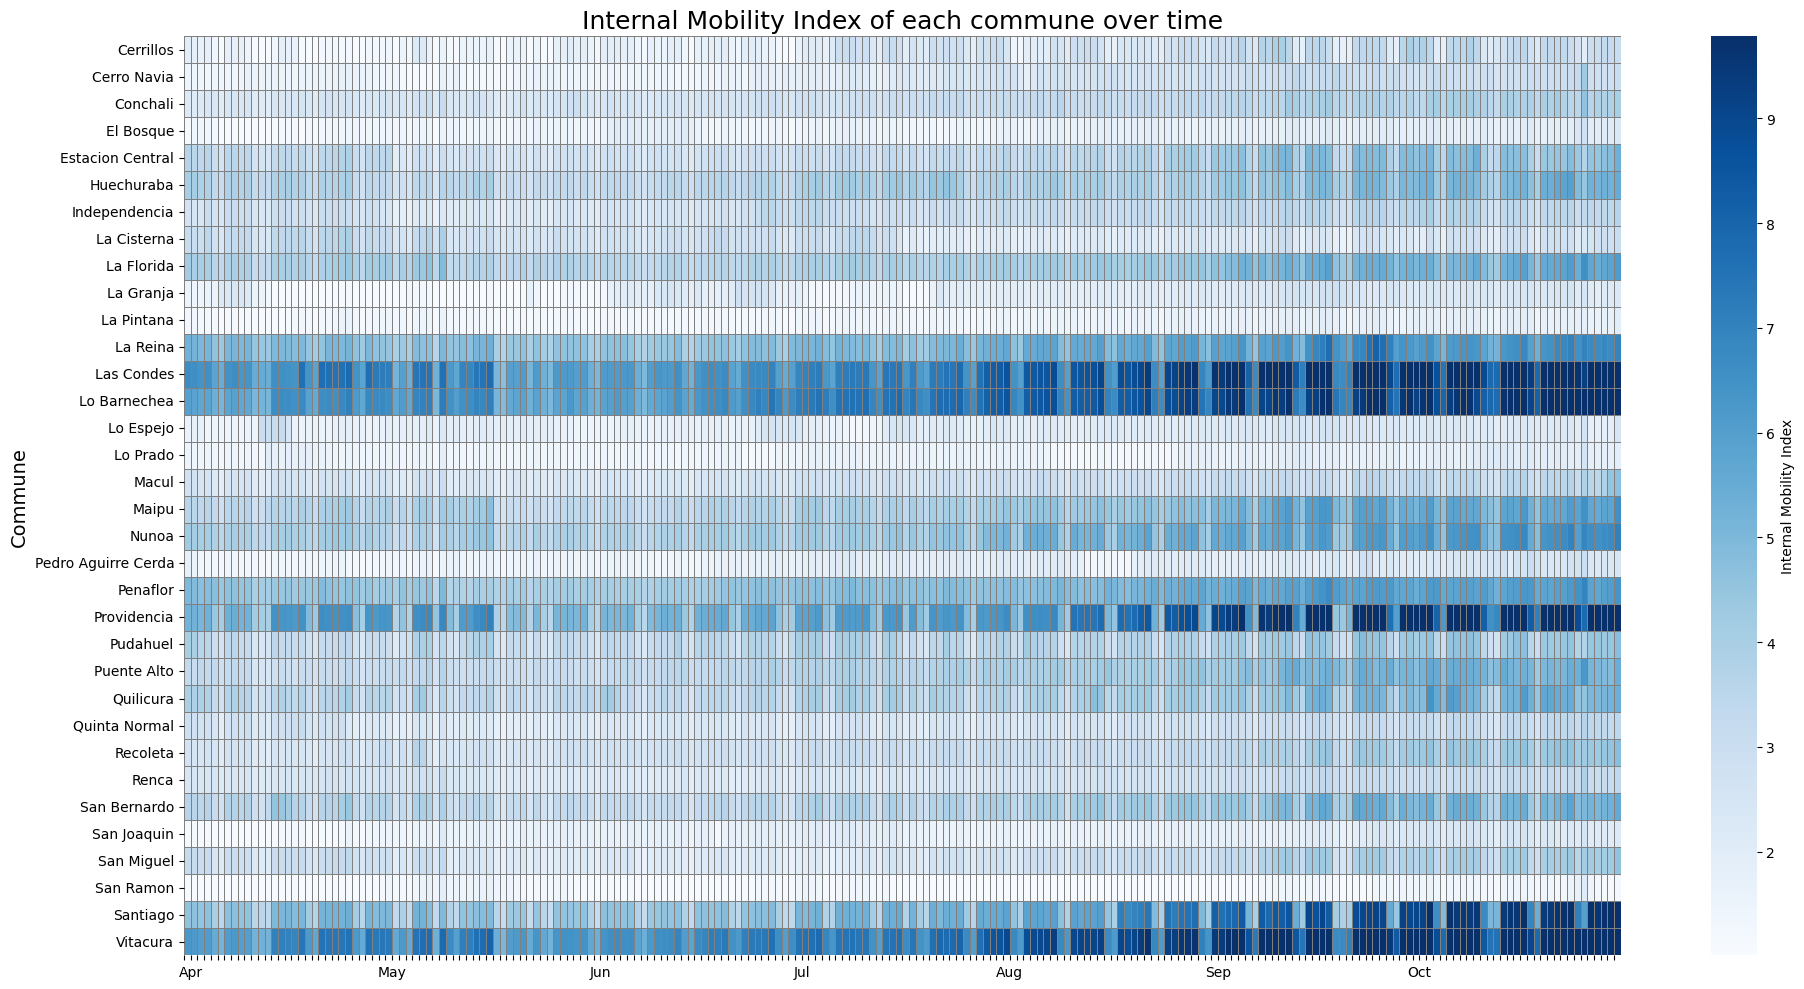

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir rango de fechas
min_date = pd.Timestamp('2020-03-31')
max_date = pd.Timestamp('2020-10-30')

covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Crear tabla pivot
covid_pivot = covid_data.pivot(index='Commune', columns='Date', values='Internal_Mobility_Index')

# Filtrar fechas
filtered_columns = [col for col in covid_pivot.columns if min_date <= col <= max_date]
covid_pivot = covid_pivot[filtered_columns]

# Crear gráfico
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    covid_pivot,
    cmap='Blues',  # 💙 paleta azul
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Internal Mobility Index'},
    robust=True,  # 🔍 mejora el contraste sin outliers extremos
    ax=ax
)

# Etiquetas de ejes
ax.set_xlabel(None)
ax.set_ylabel("Commune", fontsize=14)

# Etiquetas del eje x (solo nombre del mes en el primer día)
tick_positions = list(range(len(filtered_columns)))
tick_labels = [
    date.strftime('%b') if date.day == 1 else ''
    for date in filtered_columns
]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=0, fontsize=10)

# Título
plt.title('Internal Mobility Index of each commune over time', fontsize=18)

# Ajustar diseño
plt.tight_layout()
plt.show()


### External Mobility Index of each commune over time:

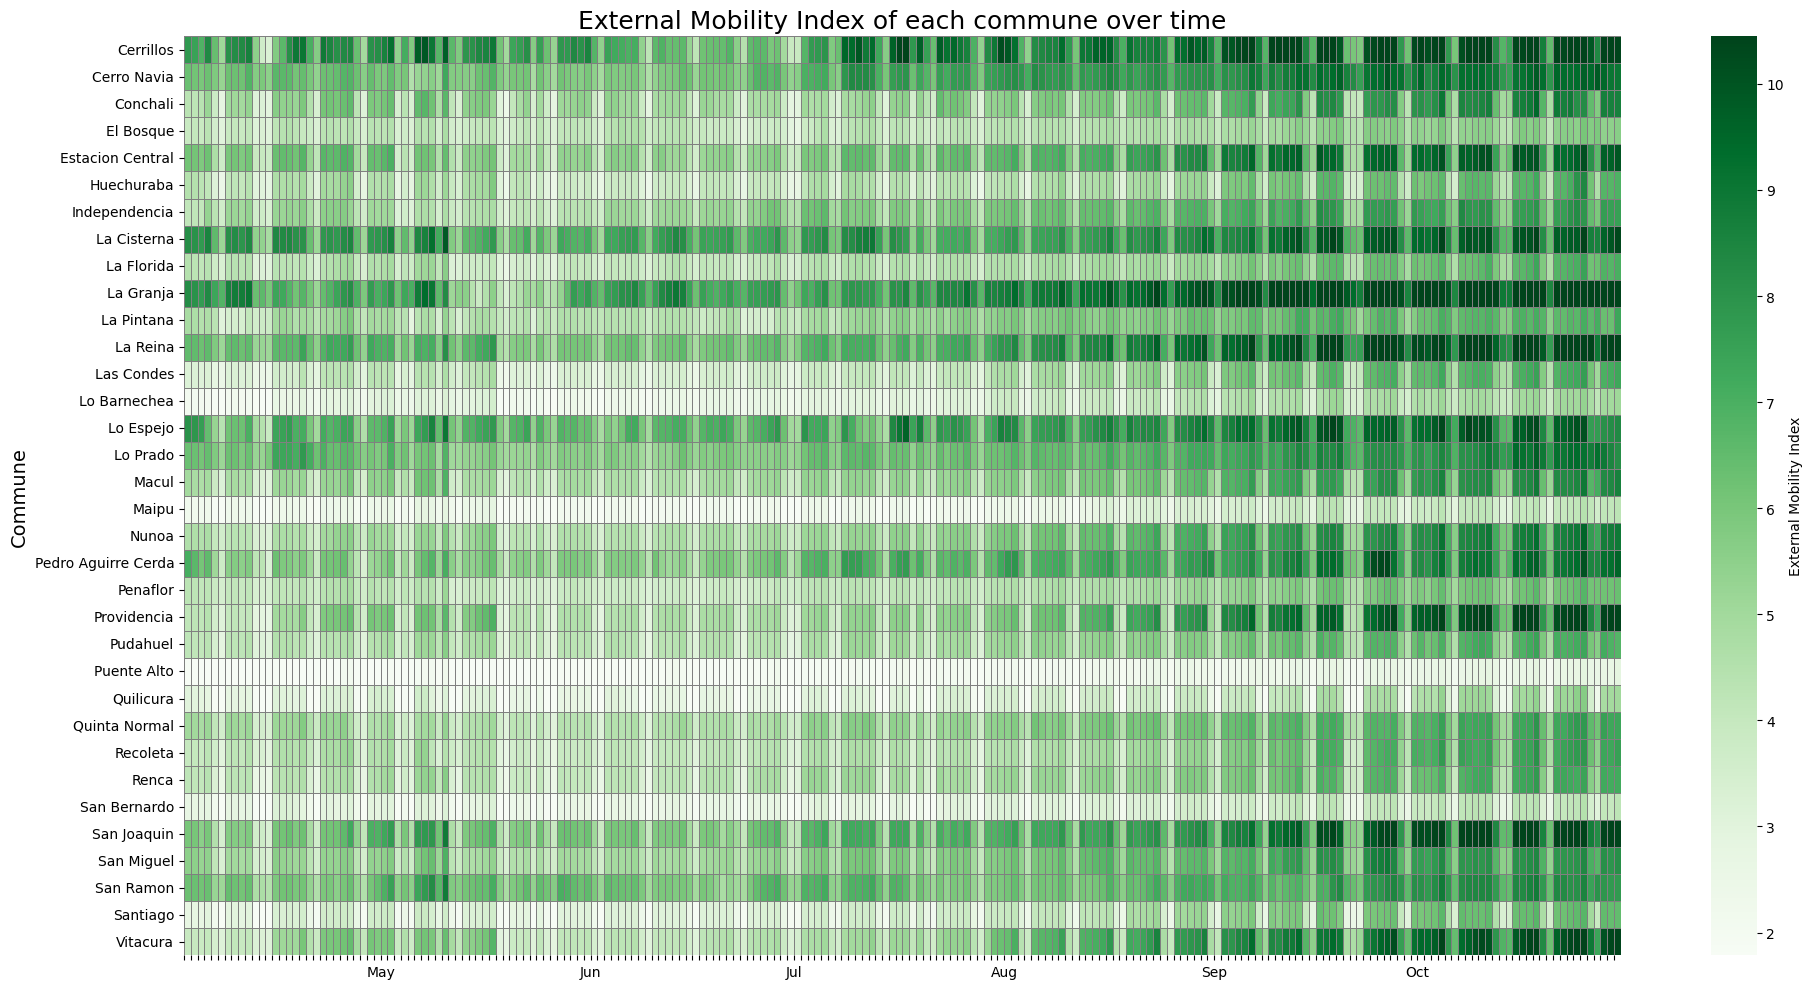

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir rango de fechas
min_date = pd.Timestamp('2020-03-31')
max_date = pd.Timestamp('2020-10-30')

# Crear la tabla pivot con el índice de movilidad externa
covid_pivot = covid_data.pivot(index='Commune', columns='Days', values='External_Mobility_Index')

# Filtrar columnas por rango de fechas
filtered_columns = [col for col in covid_pivot.columns if min_date <= col <= max_date]
covid_pivot = covid_pivot[filtered_columns]

# Crear el heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    covid_pivot,
    cmap='Greens',  # 💚 Paleta verde clara a intensa
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'External Mobility Index'},
    robust=True,  # Mejora el contraste
    ax=ax
)

# Etiquetas de ejes
ax.set_xlabel(None)
ax.set_ylabel("Commune", fontsize=14)

# Etiquetas del eje x (solo el nombre del mes si es el primer día)
tick_positions = list(range(len(filtered_columns)))
tick_labels = [
    date.strftime('%b') if date.day == 1 else ''
    for date in filtered_columns
]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=0, fontsize=10)

# Título
plt.title('External Mobility Index of each commune over time', fontsize=18)

# Ajustar diseño
plt.tight_layout()
plt.show()

### Step by Step Plan:

In [19]:
covid_data['Step_Label'].unique()

array(['Sin Medida', 'Cuarentena', 'Transición', 'Preparación',
       'Apertura'], dtype=object)

In [20]:
# Rearrange the Step by Step_Label
remap_step = {'Sin Medida': 'Unrestricted', 'Cuarentena': 'Quarantine', 'Transición':'Transition', 'Preparación':'Preparation','Apertura':'Opening'}
covid_data['Step_Label'] = covid_data['Step_Label'].map(remap_step)

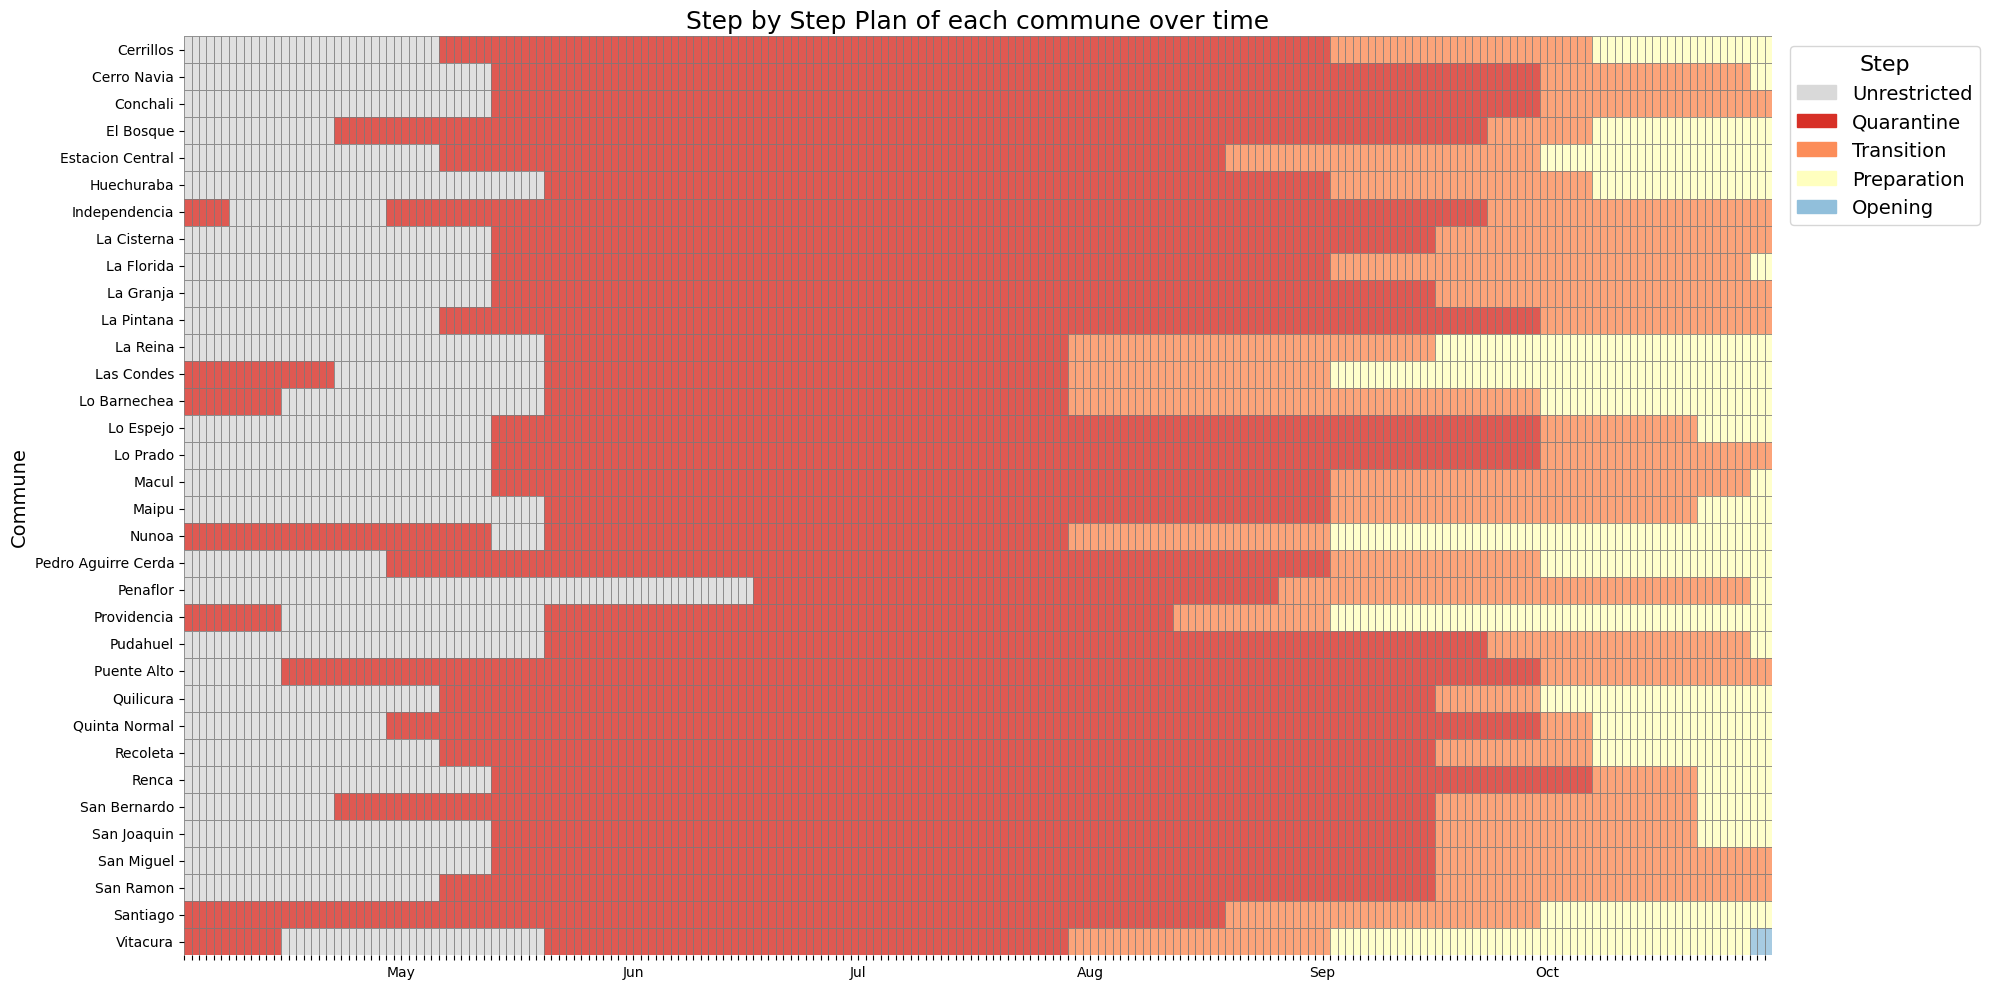

In [21]:
# Definir el rango de fechas
min_date = pd.Timestamp('2020-03-31')
max_date = pd.Timestamp('2020-10-30')

# Crear la tabla pivot de los pasos
covid_pivot = covid_data.pivot(index='Commune', columns='Days', values='Step')

# Filtrar columnas dentro del rango de fechas
filtered_columns = [col for col in covid_pivot.columns if min_date <= col <= max_date]
covid_pivot = covid_pivot[filtered_columns]

# Nueva paleta con amarillo para Preparación y azul para Apertura
step_colors = ['#d9d9d9', '#d73027', '#fc8d59', '#ffffbf', '#91bfdb']
step_labels = ['Unrestricted', 'Quarantine', 'Transition', 'Preparation', 'Opening']

# Crear el heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    covid_pivot,
    cmap=sns.color_palette(step_colors, as_cmap=True),
    linewidths=0.5,
    linecolor='gray',
    cbar=False,
    ax=ax,
    alpha=0.8  # Ajustar la transparencia
)

# Etiquetas del eje
ax.set_xlabel(None)
ax.set_ylabel("Commune", fontsize=14)

# Etiquetas del eje x: mostrar solo nombre del mes si es el primer día
tick_positions = list(range(len(filtered_columns)))
tick_labels = [
    date.strftime('%b') if date.day == 1 else ''
    for date in filtered_columns
]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=0, fontsize=10)

# Crear leyenda personalizada
legend_handles = [
    mpatches.Patch(color=color, label=label)
    for color, label in zip(step_colors, step_labels)
]

plt.legend(
    handles=legend_handles,
    title="Step",
    bbox_to_anchor=(1.005, 1),
    loc='upper left',
    fontsize=14,
    title_fontsize=16
)

# Título del gráfico
plt.title('Step by Step Plan of each commune over time', fontsize=18)

# Ajustar diseño
plt.tight_layout()
plt.show()

#### Comportamiento de casos por comunas según Plan Paso a Paso

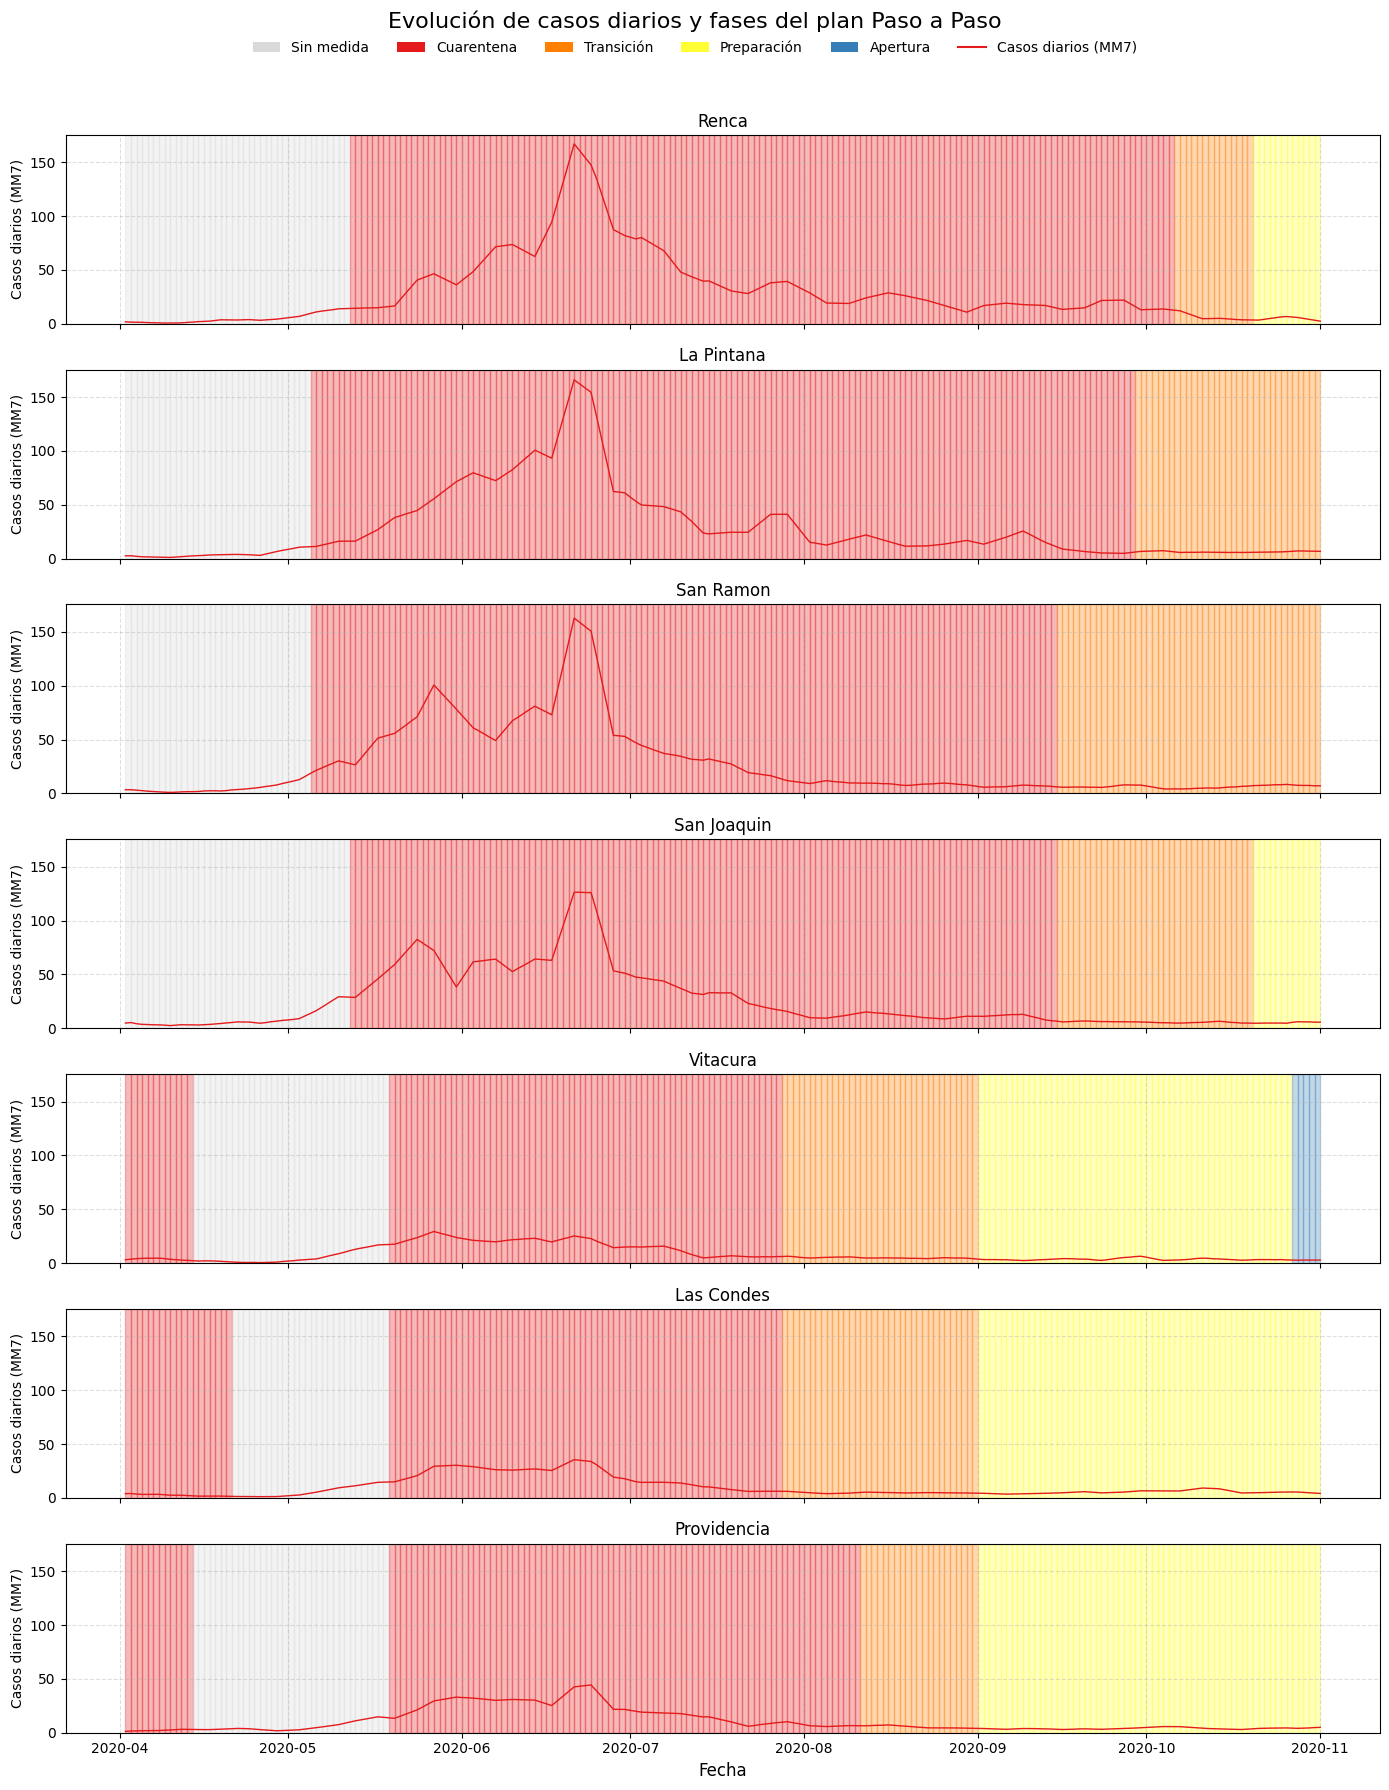

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Comunas seleccionadas
comunas_seleccionadas = ['Renca', 'La Pintana', 'San Ramon', 'San Joaquin', 'Vitacura', 'Las Condes', 'Providencia']

# Colores Paso a Paso
step_colors = {
    0: '#d9d9d9',  # Sin medida
    1: '#e41a1c',  # Cuarentena
    2: '#ff7f00',  # Transición
    3: '#ffff33',  # Preparación
    4: '#377eb8'   # Apertura
}

# Calcular el máximo de casos en todas las comunas seleccionadas
max_casos = covid_data[covid_data['Commune'].isin(comunas_seleccionadas)]['Gross_Daily_Cases_Mobile_Average_7_Days'].max()

# Crear figura
n = len(comunas_seleccionadas)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(14, 2.5 * n), sharex=True)

# Loop por comuna
for i, comuna in enumerate(comunas_seleccionadas):
    ax = axes[i]
    df = covid_data[covid_data['Commune'] == comuna].copy().sort_values('Days')
    df['Days'] = pd.to_datetime(df['Days'])

    for j in range(1, len(df)):
        paso = df['Step'].iloc[j]
        inicio = df['Days'].iloc[j - 1]
        fin = df['Days'].iloc[j]
        ax.axvspan(inicio, fin, color=step_colors.get(paso, '#ffffff'), alpha=0.3)

    ax.plot(df['Days'], df['Gross_Daily_Cases_Mobile_Average_7_Days'], color='#e41a1c', lw=1)
    ax.set_title(comuna, fontsize=12)
    ax.set_ylabel('Casos diarios (MM7)', fontsize=10)
    ax.set_ylim(0, max_casos * 1.05)  # Eje Y común
    ax.grid(True, linestyle='--', alpha=0.4)

axes[-1].set_xlabel("Fecha", fontsize=12)

# Leyenda
legend_labels = ['Sin medida', 'Cuarentena', 'Transición', 'Preparación', 'Apertura']
legend_elements = [mpatches.Patch(facecolor=step_colors[i], label=label) for i, label in enumerate(legend_labels)]
legend_elements.append(plt.Line2D([0], [0], color='#e41a1c', label='Casos diarios (MM7)'))

fig.legend(handles=legend_elements, loc='upper center', ncol=6, frameon=False, fontsize=10, bbox_to_anchor=(0.5, 1.01))

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Evolución de casos diarios y fases del plan Paso a Paso", fontsize=16, y=1.02)
plt.show()


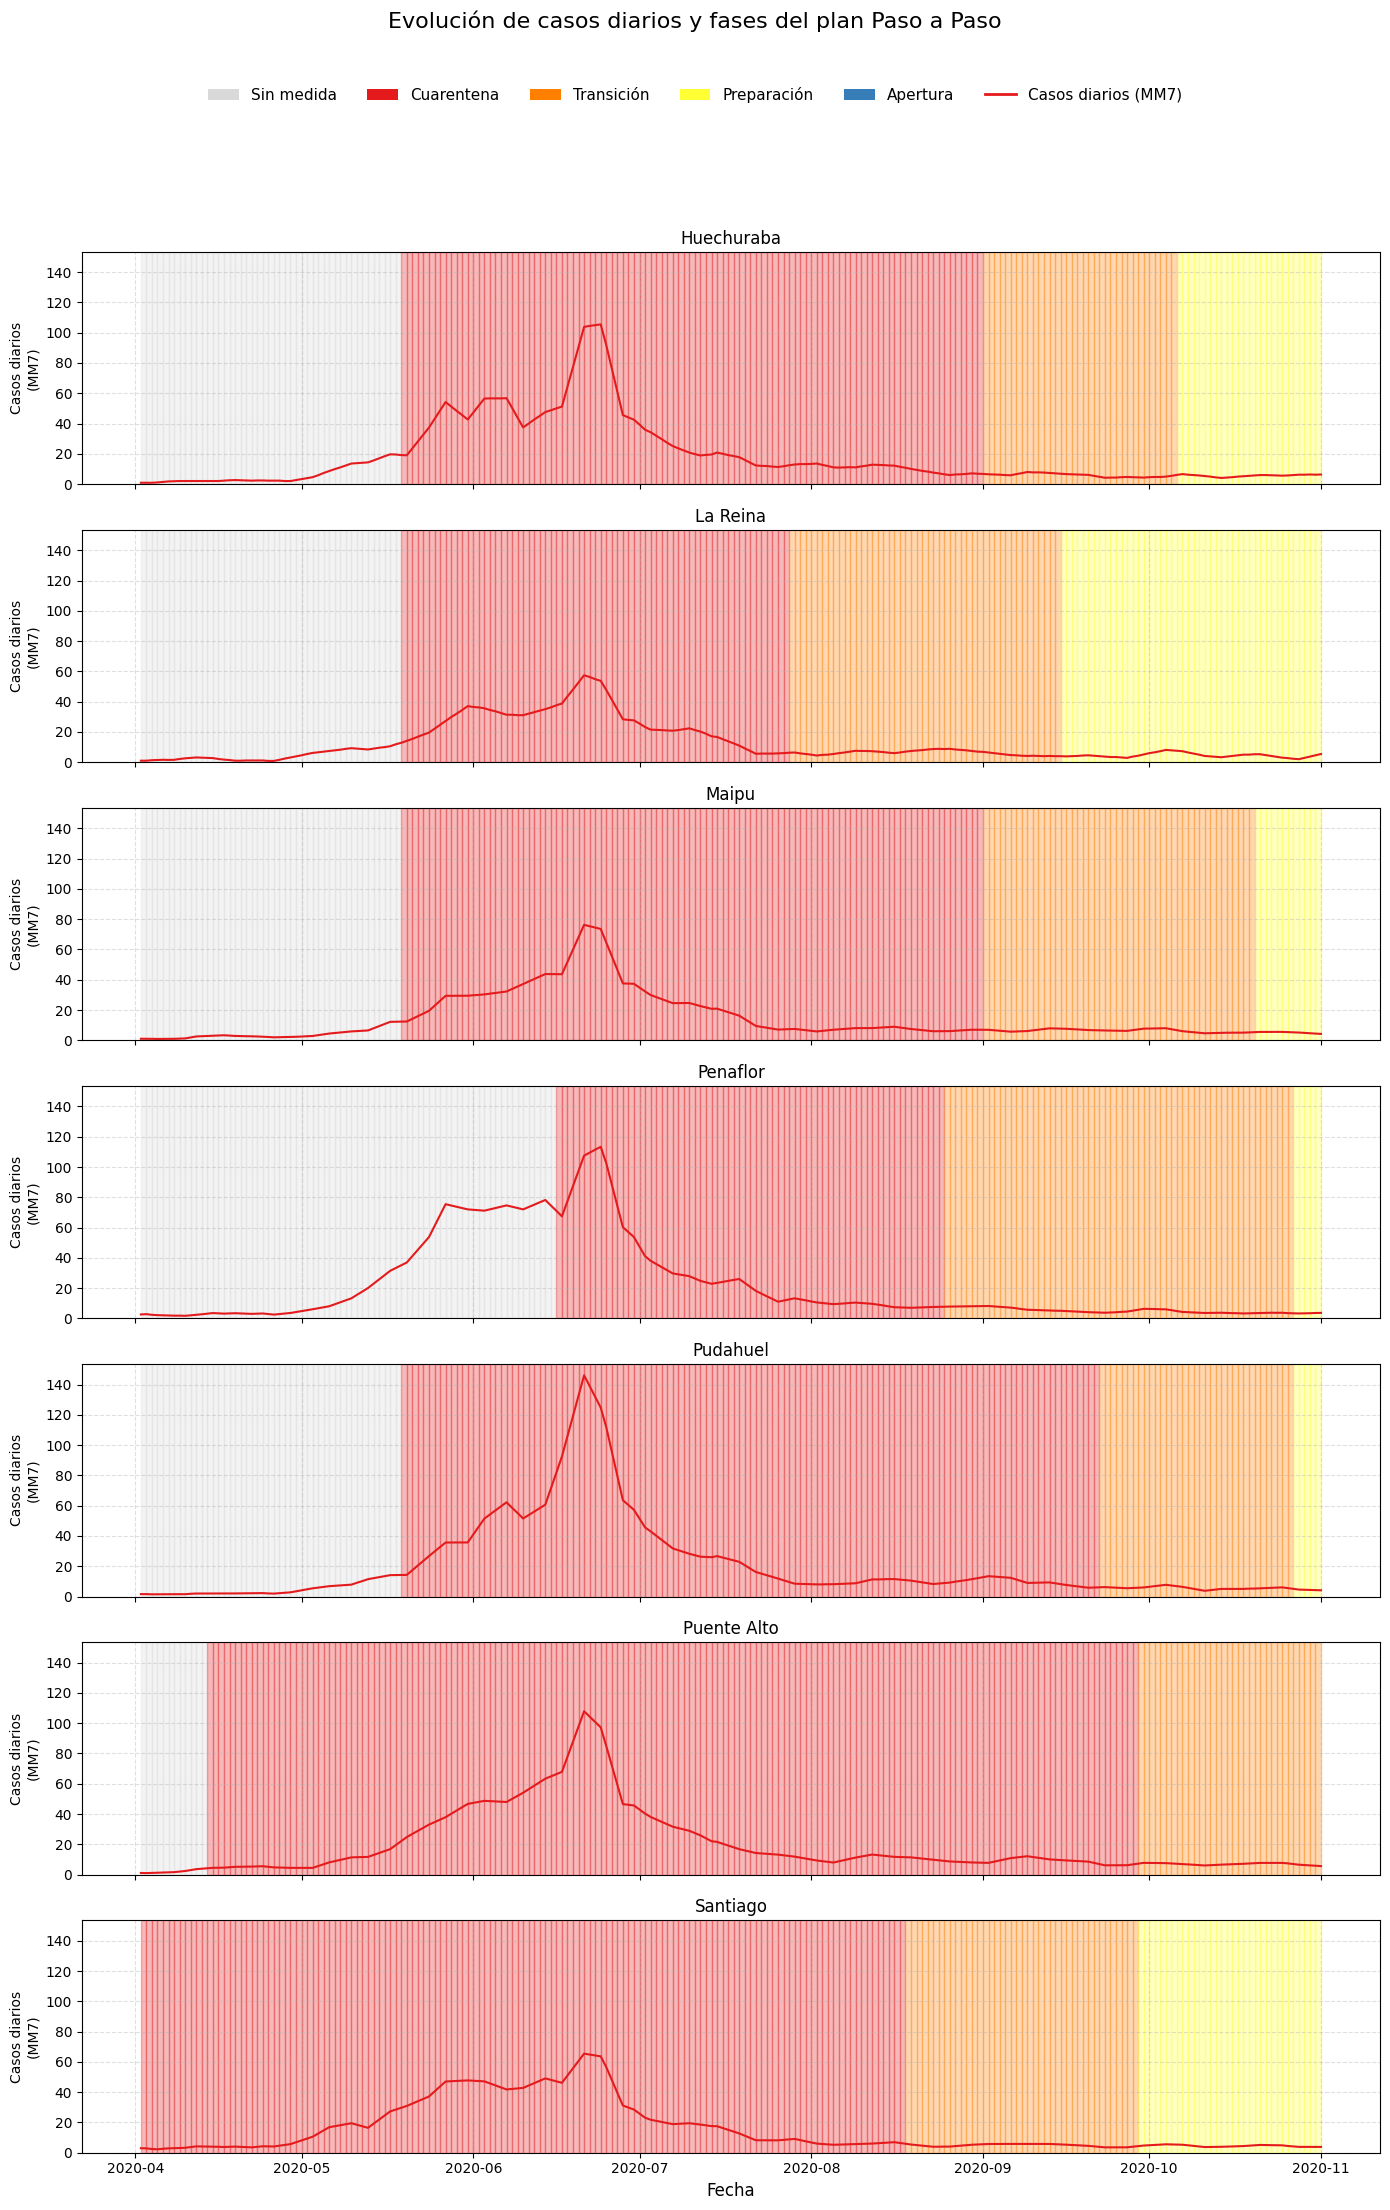

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Comunas seleccionadas (sin tildes)
comunas = ['Huechuraba', 'La Reina', 'Maipu', 'Penaflor', 'Pudahuel', 'Puente Alto', 'Santiago']

# Colores para los pasos corregidos (según tu última aclaración)
step_colors = {
    0: '#d9d9d9',  # Sin medida (gris)
    1: '#e41a1c',  # Cuarentena (rojo)
    2: '#ff7f00',  # Transición (naranjo)
    3: '#ffff33',  # Preparación (amarillo)
    4: '#377eb8'   # Apertura inicial (azul)
}

# Calcular el máximo global de casos para normalizar el eje y
max_val = covid_data[covid_data['Commune'].isin(comunas)]['Gross_Daily_Cases_Mobile_Average_7_Days'].max()

# Crear figura con subplots
fig, axes = plt.subplots(nrows=len(comunas), ncols=1, figsize=(14, 3 * len(comunas)), sharex=True)

# Graficar cada comuna
for i, comuna in enumerate(comunas):
    ax = axes[i]
    df = covid_data[covid_data['Commune'] == comuna].copy().sort_values('Days')
    df['Days'] = pd.to_datetime(df['Days'])

    # Colorear fondo según paso
    for j in range(1, len(df)):
        paso = df['Step'].iloc[j]
        start = df['Days'].iloc[j - 1]
        end = df['Days'].iloc[j]
        ax.axvspan(start, end, color=step_colors.get(paso, '#ffffff'), alpha=0.3)

    # Línea de casos diarios (media móvil 7 días)
    ax.plot(df['Days'], df['Gross_Daily_Cases_Mobile_Average_7_Days'], color='#e41a1c', lw=1.5)

    ax.set_title(comuna, fontsize=12)
    ax.set_ylim(0, max_val * 1.05)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_ylabel('Casos diarios\n(MM7)', fontsize=10)

axes[-1].set_xlabel("Fecha", fontsize=12)

# Leyenda personalizada
legend_labels = ['Sin medida', 'Cuarentena', 'Transición', 'Preparación', 'Apertura']
legend_elements = [mpatches.Patch(facecolor=step_colors[i], label=label) for i, label in enumerate(legend_labels)]
legend_elements.append(plt.Line2D([0], [0], color='#e41a1c', lw=2, label='Casos diarios (MM7)'))

fig.legend(handles=legend_elements, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.02), fontsize=11, frameon=False)

plt.suptitle("Evolución de casos diarios y fases del plan Paso a Paso", fontsize=16, y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## Definition of HMM model formulas:

Create `ntimes` from clean data

In [24]:
# Create `ntimes` from clean data
ntimes = IntVector(covid_data.groupby("Commune")["Days"].count().tolist())

# Validate consistency:
print(sum(ntimes))        # Total observations (must match len(covid_data))
print(len(covid_data))    # To check alignment

7276
7276


### Convert to R format:

In [25]:
pandas2ri.activate()
covid_data_r = pandas2ri.py2rpy(covid_data)

The transition probabilities between states depend on the covariates ‘IM_internal’, ‘IM_external’ and the commune

In [26]:
# Main observation:
hmm_formula = r("as.formula")("Gross_Daily_Cases_Mobile_Average_7_Days ~ 1")

# Transition covariates:
trans_formula = r("as.formula")("~ Internal_Mobility_Index + External_Mobility_Index + Commune")

# Distribution of observation:
gaussian_family = r['gaussian']()

### Creation of the HMM model:

In [27]:
hmm_model = depmixS4.depmix( 
    response=hmm_formula, # Main observation
    nstates=3,  # Number of hidden states
    family=gaussian_family,  # Distribution of observation
    data=covid_data_r, # Data
    transition=trans_formula, # Transition covariates
    ntimes=ntimes # Number of observations per group
)

print("HMM model configured:")
print(hmm_model)

HMM model configured:
Initial state probabilities model 
  pr1   pr2   pr3 
0.333 0.333 0.333 

Transition model for state (component) 1 
Model of type multinomial (mlogit), formula: ~Internal_Mobility_Index + External_Mobility_Index + Commune
Coefficients: 
                           St1 St2 St3
(Intercept)                  0   0   0
Internal_Mobility_Index      0   0   0
External_Mobility_Index      0   0   0
CommuneCerro Navia           0   0   0
CommuneConchali              0   0   0
CommuneEl Bosque             0   0   0
CommuneEstacion Central      0   0   0
CommuneHuechuraba            0   0   0
CommuneIndependencia         0   0   0
CommuneLa Cisterna           0   0   0
CommuneLa Florida            0   0   0
CommuneLa Granja             0   0   0
CommuneLa Pintana            0   0   0
CommuneLa Reina              0   0   0
CommuneLas Condes            0   0   0
CommuneLo Barnechea          0   0   0
CommuneLo Espejo             0   0   0
CommuneLo Prado              0   0   0


## Model adjustment:

In [28]:
# Adjust the HMM model
hmm_fitted = depmixS4.fit(hmm_model)

# Verify adjusted model information
print("\nAdjusted HMM model:")
print(hmm_fitted)


converged at iteration 39 with logLik: -22164.39 

Adjusted HMM model:
Convergence info: Log likelihood converged to within tol. (relative change) 
'log Lik.' -22164.39 (df=224)
AIC:  44776.78 
BIC:  46320.67 



## Extract sequence of states (Viterbi) and join with data:

In [29]:
# Extract the most probable sequence of states (Viterbi path and probabilities)
posterior_probs = r['slot'](hmm_fitted, "posterior")

# Convert posterior_probs to pandas DataFrame
viterbi_df = pandas2ri.rpy2py(posterior_probs).reset_index(drop=True)
viterbi_df['row_id'] = viterbi_df.index

### Merged with the original data:

In [30]:
viterbi_merged = pd.merge(viterbi_df, covid_data, on='row_id', how='inner')
print(viterbi_merged.head())

   state        S1            S2        S3  row_id  Internal_Mobility_Index  \
0    3.0  0.000000  0.000000e+00  1.000000       0                 1.970381   
1    3.0  0.000275  8.638053e-11  0.999725       1                 1.845790   
2    3.0  0.000348  6.453303e-07  0.999652       2                 1.678598   
3    3.0  0.000581  3.874640e-07  0.999418       3                 1.736766   
4    3.0  0.000707  6.989014e-06  0.999286       4                 1.331296   

   External_Mobility_Index  Per_Capita_Income  Cumulative_Cases_Rate  \
0                 7.804008          267197.56               2.248303   
1                 7.471452          267197.56               4.496605   
2                 6.891732          267197.56               4.496605   
3                 8.317872          267197.56               4.496605   
4                 6.378498          267197.56               4.496605   

   Average_Household_Persons  ...  Quarantine_End_Date  Gross_Daily_Cases  \
0              

In [31]:
# Rearrange the states to match the desired interpretation:
remap_estado = {1: 2, 2: 3, 3: 1}
viterbi_merged['Reordened_state'] = viterbi_merged['state'].map(remap_estado)


## Visualizations:

### Viterbi Sequence:

In [32]:
viterbi_merged.head()

state        S1            S2        S3  row_id  Internal_Mobility_Index  \
0    3.0  0.000000  0.000000e+00  1.000000       0                 1.970381   
1    3.0  0.000275  8.638053e-11  0.999725       1                 1.845790   
2    3.0  0.000348  6.453303e-07  0.999652       2                 1.678598   
3    3.0  0.000581  3.874640e-07  0.999418       3                 1.736766   
4    3.0  0.000707  6.989014e-06  0.999286       4                 1.331296   

   External_Mobility_Index  Per_Capita_Income  Cumulative_Cases_Rate  \
0                 7.804008          267197.56               2.248303   
1                 7.471452          267197.56               4.496605   
2                 6.891732          267197.56               4.496605   
3                 8.317872          267197.56               4.496605   
4                 6.378498          267197.56               4.496605   

   Average_Household_Persons  ...  Gross_Daily_Cases  \
0                   3.145581  ...           2.248303   
1                   3.145581  ...           2.248303   
2                   3.145581  ...           0.000000   
3                   3.145581  ...           0.000000   
4                   3.145581  ...           0.000000   

   Gross_Daily_Cases_Mobile_Average_7_Days  Connectivity_and_Mobility  \
0                                 2.248303                          2   
1                                 2.248303                          2   
2                                 1.498868                          2   
3                                 1.124151                          2   
4                                 0.899321                          2   

  Housing_and_Environment Labor_Conditions Business_Environment  \
0                       2                3                    3   
1                       2                3                    3   
2                       2                3                    3   
3                       2                3                    3   
4                       2                3                    3   

   Health_and_Environment  Socio_cultural_conditions  \
0                       4                          2   
1                       4                          2   
2                       4                          2   
3                       4                          2   
4                       4                          2   

   Urban_Quality_of_Life_Index_2024 Reordened_state  
0                                16               1  
1                                16               1  
2                                16               1  
3                                16               1  
4                                16               1  

[5 rows x 37 columns]

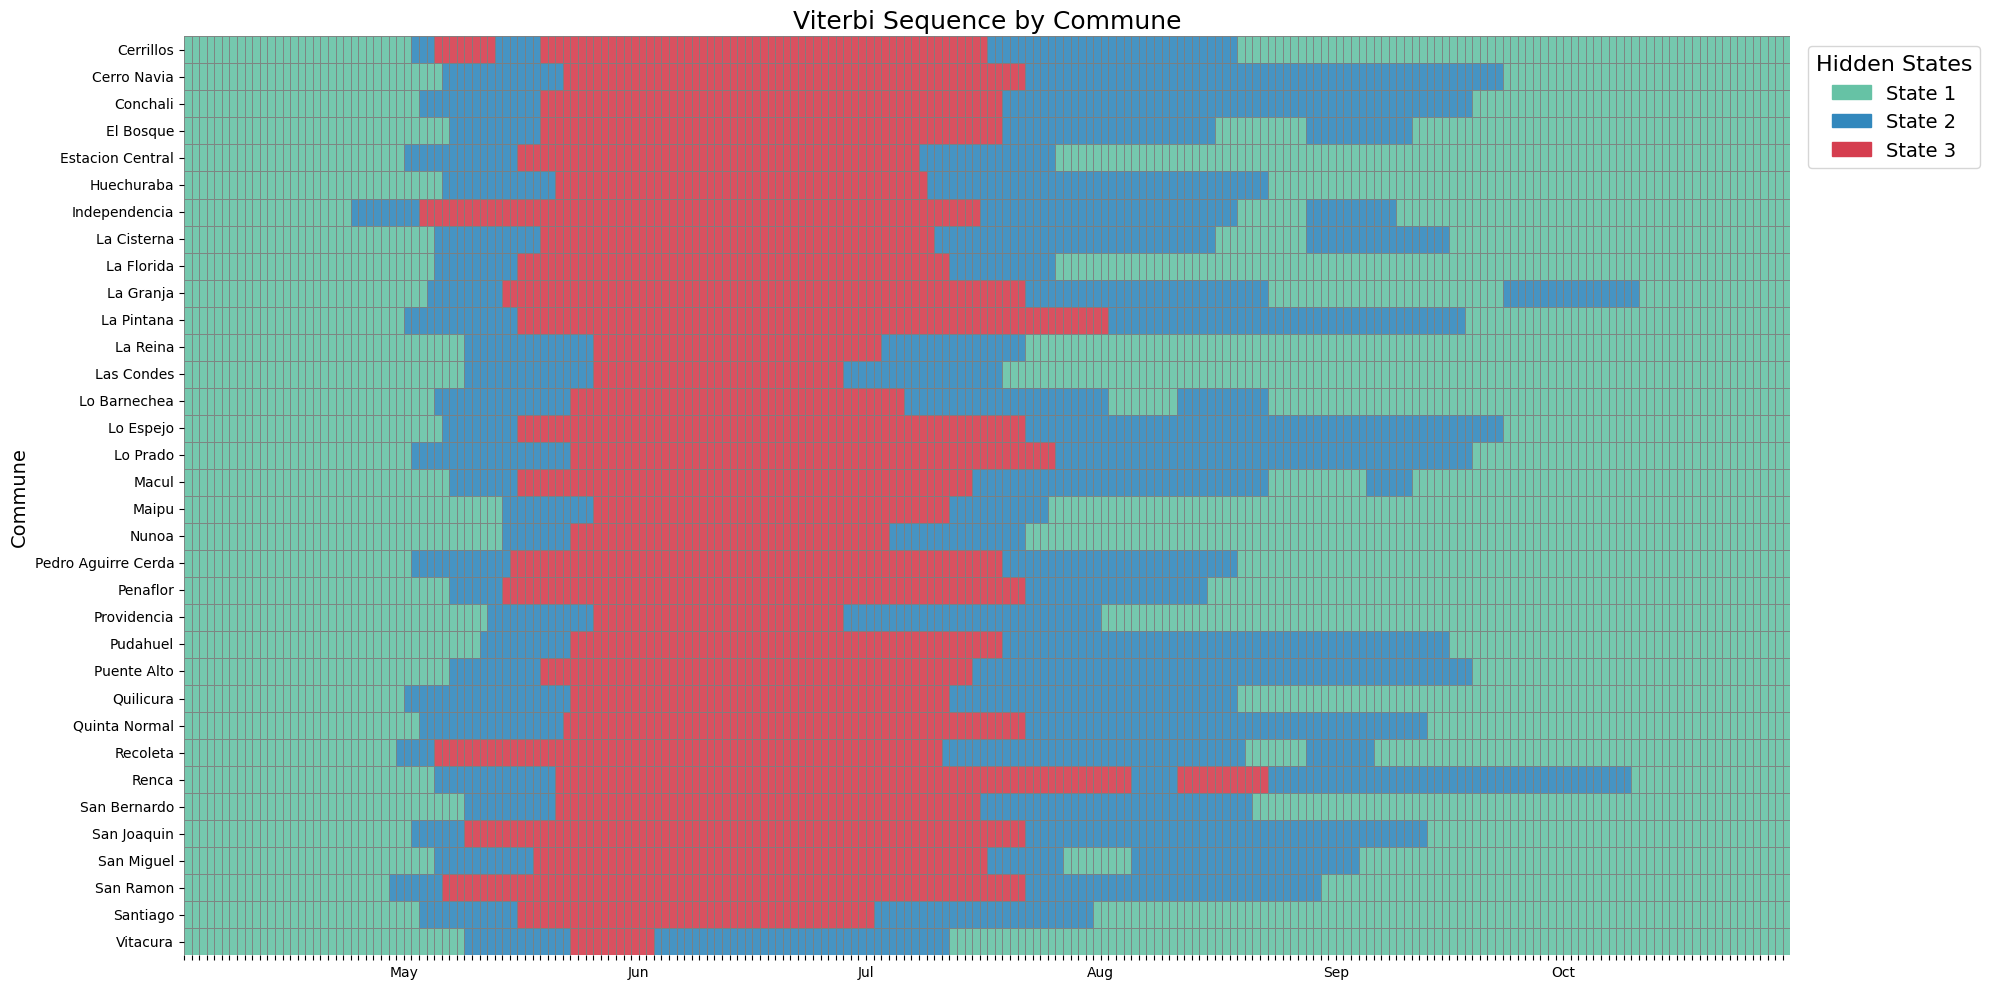

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Crear la tabla pivotada
viterbi_pivot = viterbi_merged.pivot(index='Commune', columns='Days', values='Reordened_state')

# Definir el rango de fechas a considerar
min_date = pd.Timestamp('2020-03-31')
max_date = pd.Timestamp('2020-10-30')

# Filtrar columnas dentro del rango de fechas
filtered_columns = [col for col in viterbi_pivot.columns if min_date <= col <= max_date]
viterbi_pivot = viterbi_pivot[filtered_columns]

# Colores estilo "Nature" / ColorBrewer
custom_colors = ['#66c2a5', '#3288bd', '#d53e4f']  # Estado 1, 2, 3

# Crear el heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    viterbi_pivot,
    cmap=sns.color_palette(custom_colors, as_cmap=True),
    linewidths=0.5,
    linecolor='gray',
    alpha=0.9,
    cbar=False,
    ax=ax
)

# Etiquetas del eje Y
ax.set_ylabel("Commune", fontsize=14)
ax.set_xlabel(None)

# Etiquetas del eje X: mostrar solo nombre del mes si es el primer día del mes
tick_positions = list(range(len(filtered_columns)))
tick_labels = [
    date.strftime('%b') if date.day == 1 else ''
    for date in filtered_columns
]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=0, fontsize=10)

# Crear leyenda personalizada
legend_labels = ['State 1', 'State 2', 'State 3']
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(custom_colors, legend_labels)]

plt.legend(
    handles=legend_handles,
    title="Hidden States",
    bbox_to_anchor=(1.005, 1),
    loc='upper left',
    fontsize=14,
    title_fontsize=16
)

# Título del gráfico
plt.title('Viterbi Sequence by Commune', fontsize=18)

# Ajustar diseño
plt.tight_layout()
plt.show()


# Characterization of Hidden States:

In [34]:
eda_data = viterbi_merged[['Reordened_state', 'Internal_Mobility_Index', 'External_Mobility_Index', 'Cumulative_Cases_Rate', 
                             'Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days', 
                             'Per_Capita_Income', 'Average_Household_Persons', 
                             'Inmigrants', 'Total_Households_Housed',
                              'Housing_Precariousness_Index', 'Higher_Education_Percentage', 'Social_Priority_Index_2020']]


In [35]:
# Variables que queremos graficar
variables = ['Internal_Mobility_Index', 'External_Mobility_Index', 'Cumulative_Cases_Rate', 
                             'Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days', 
                             'Per_Capita_Income', 'Average_Household_Persons', 
                             'Inmigrants', 'Total_Households_Housed',
                              'Housing_Precariousness_Index', 'Higher_Education_Percentage', 'Social_Priority_Index_2020']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

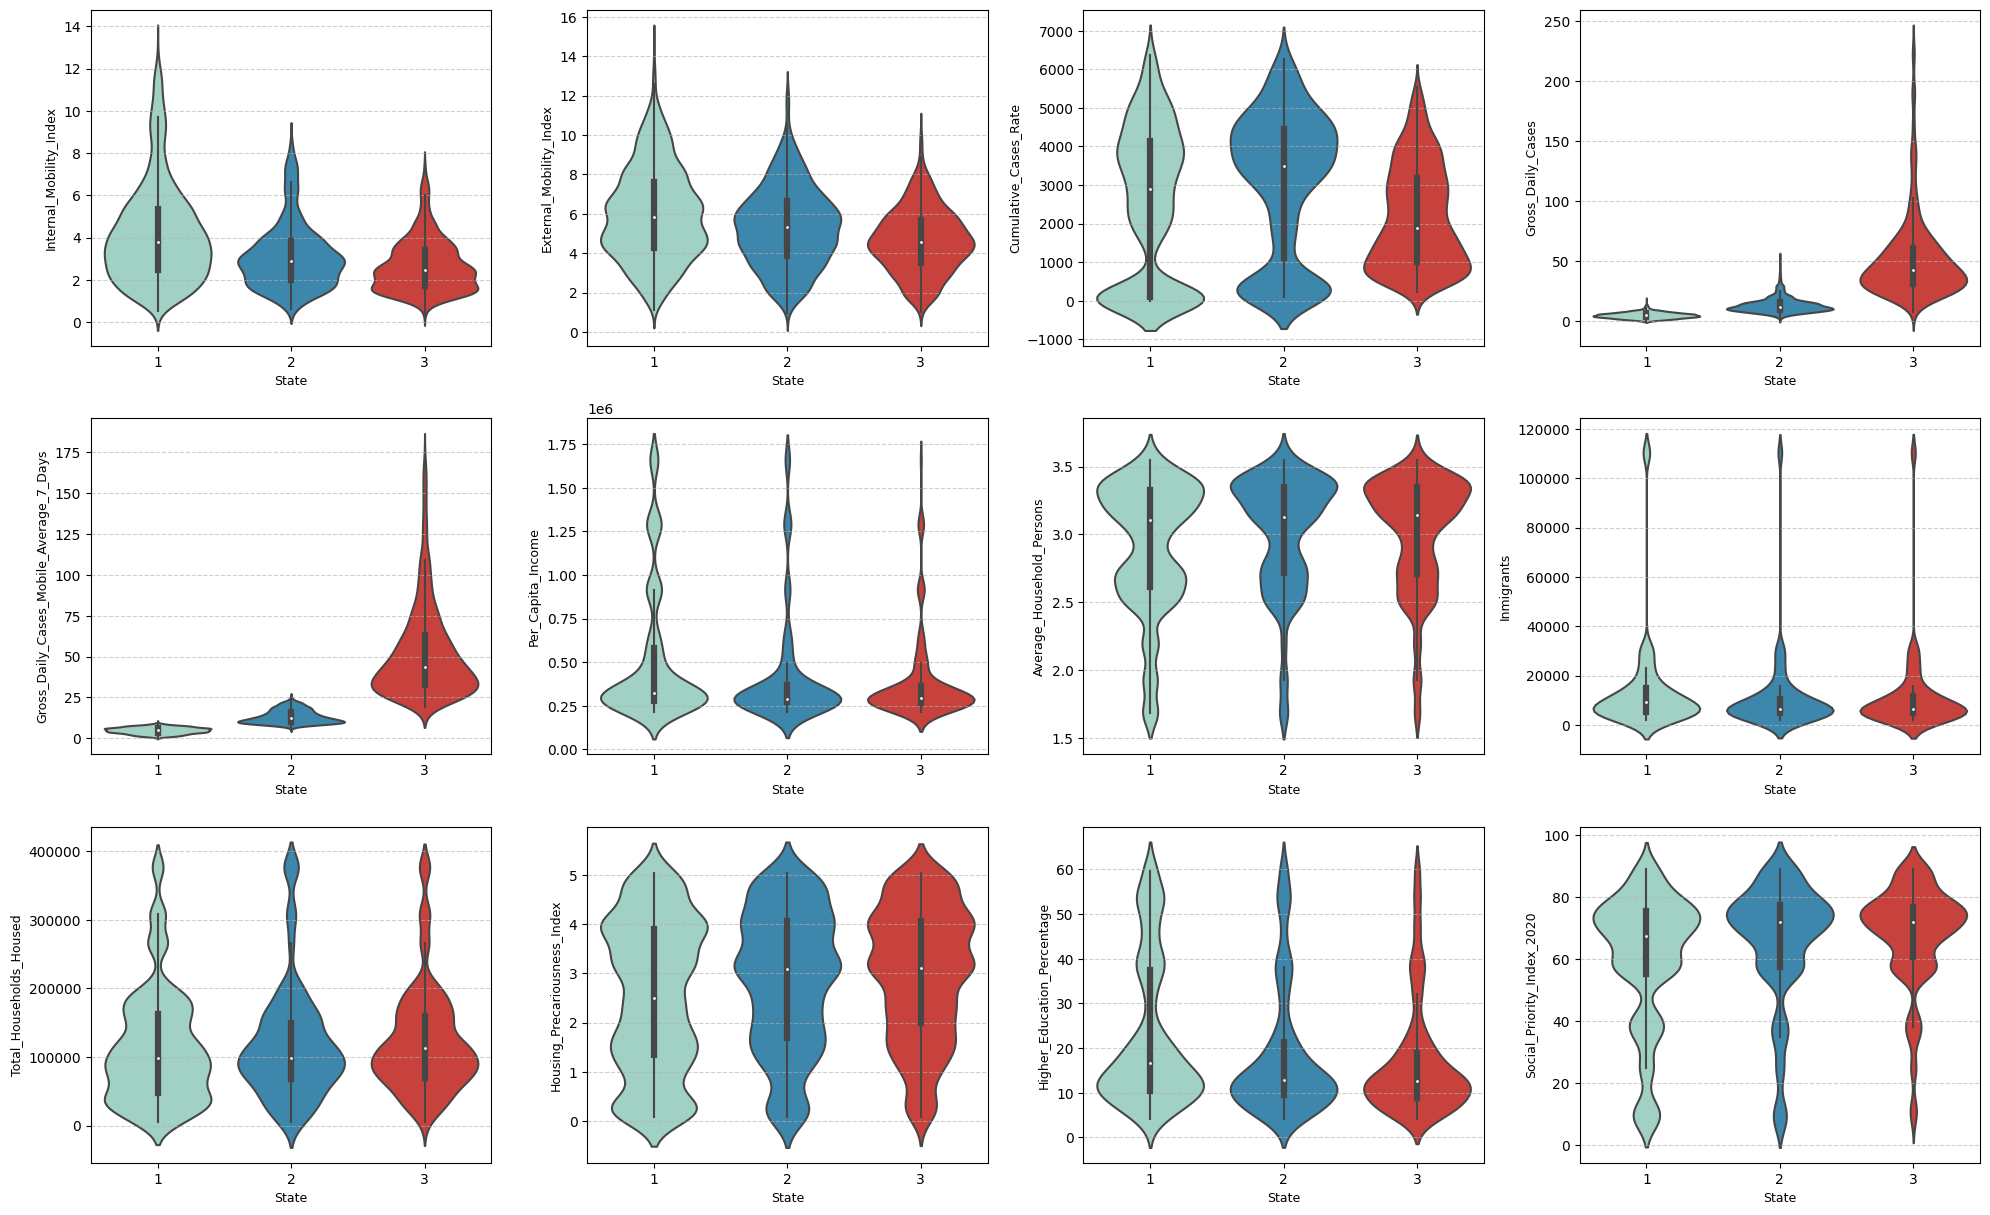

In [36]:
# Convertir la columna 'state' a cadenas con formato flotante
eda_data.loc[:, 'Reordened_state'] = eda_data['Reordened_state'].astype(str)

# Nueva paleta de colores basada en el heatmap de Viterbi
custom_palette = {
    '1': '#99d8c9',  # Estado 1 - leve (verde agua)
    '2': '#2b8cbe',  # Estado 2 - moderado (azul)
    '3': '#de2d26'   # Estado 3 - severo (rojo)
}

# Configuración de la figura
n_rows = 5  # Número de filas
n_cols = 4  # Número de columnas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Tamaño ajustado

# Aplanar los ejes para iterar más fácilmente
axes = axes.ravel()

# Crear los violinplots para cada variable
for i, var in enumerate(variables):
    sns.violinplot(
        data=eda_data, 
        x='Reordened_state', 
        y=var, 
        hue='Reordened_state', 
        palette=custom_palette, 
        ax=axes[i], 
        dodge=False
    )
    axes[i].legend_.remove()  # Eliminar leyenda individual
    axes[i].set_xlabel('State', fontsize=9)
    axes[i].set_ylabel(var, fontsize=9)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

# Eliminar subplots vacíos si hay más ejes que variables
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espacio general del layout
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# Lista de variables corregidas según tus columnas reales
variables_violines = [
    'Gross_Daily_Cases_Mobile_Average_7_Days',
    'Gross_Daily_Cases',
    'Internal_Mobility_Index',
    'External_Mobility_Index',
    'Per_Capita_Income',
    'Average_Household_Persons',
    'Inmigrants',
    'Total_Households_Housed',
    'Housing_Precariousness_Index',
    'Higher_Education_Percentage',
    'Social_Priority_Index_2020'
]

# Calcular los estadígrafos por estado oculto
summary_stats = []

for var in variables_violines:
    stats = eda_data.groupby('Reordened_state')[var].agg([
        'count', 'mean', 'median', 'std', 'min', 'max',
        lambda x: x.quantile(0.25),
        lambda x: x.quantile(0.75),
        lambda x: x.quantile(0.75) - x.quantile(0.25)
    ])
    stats.columns = ['n', 'media', 'mediana', 'DE', 'mínimo', 'máximo', 'Q1', 'Q3', 'RIC']
    stats['variable'] = var
    summary_stats.append(stats)

# Unir resultados
summary_df = pd.concat(summary_stats).reset_index()

# Reordenar columnas para claridad
summary_df = summary_df[['variable', 'Reordened_state', 'n', 'media', 'mediana', 'DE', 'mínimo', 'Q1', 'Q3', 'RIC', 'máximo']]

# Mostrar tabla final
summary_df


variable Reordened_state     n  \
0   Gross_Daily_Cases_Mobile_Average_7_Days               1  3493   
1   Gross_Daily_Cases_Mobile_Average_7_Days               2  1834   
2   Gross_Daily_Cases_Mobile_Average_7_Days               3  1949   
3                         Gross_Daily_Cases               1  3493   
4                         Gross_Daily_Cases               2  1834   
5                         Gross_Daily_Cases               3  1949   
6                   Internal_Mobility_Index               1  3493   
7                   Internal_Mobility_Index               2  1834   
8                   Internal_Mobility_Index               3  1949   
9                   External_Mobility_Index               1  3493   
10                  External_Mobility_Index               2  1834   
11                  External_Mobility_Index               3  1949   
12                        Per_Capita_Income               1  3493   
13                        Per_Capita_Income               2  1834   
14                        Per_Capita_Income               3  1949   
15                Average_Household_Persons               1  3493   
16                Average_Household_Persons               2  1834   
17                Average_Household_Persons               3  1949   
18                               Inmigrants               1  3493   
19                               Inmigrants               2  1834   
20                               Inmigrants               3  1949   
21                  Total_Households_Housed               1  3493   
22                  Total_Households_Housed               2  1834   
23                  Total_Households_Housed               3  1949   
24             Housing_Precariousness_Index               1  3493   
25             Housing_Precariousness_Index               2  1834   
26             Housing_Precariousness_Index               3  1949   
27              Higher_Education_Percentage               1  3493   
28              Higher_Education_Percentage               2  1834   
29              Higher_Education_Percentage               3  1949   
30               Social_Priority_Index_2020               1  3493   
31               Social_Priority_Index_2020               2  1834   
32               Social_Priority_Index_2020               3  1949   

            media        mediana             DE         mínimo             Q1  \
0        4.911165       4.973671       1.933434       0.399693       3.533974   
1       13.431337      12.429146       4.026658       5.976945      10.119971   
2       52.339664      43.936877      27.913031      18.949978      32.543545   
3        5.056503       4.837359       2.444613       0.000000       3.285190   
4       13.544502      12.239203       6.047238       1.994973       9.533028   
5       52.115166      42.740034      34.521586       7.496308      30.776364   
6        4.236591       3.780322       2.390730       0.544551       2.459249   
7        3.150077       2.895794       1.557867       0.635662       2.002545   
8        2.698699       2.455210       1.254624       0.403075       1.706218   
9        6.011209       5.856697       2.353286       1.123766       4.269280   
10       5.347341       5.343473       2.003800       0.965216       3.856956   
11       4.629883       4.552232       1.612772       1.027685       3.509626   
12  518166.721291  324016.690000  388124.426318  211826.830000  280363.720000   
13  424786.698833  290623.380000  325011.639762  211826.830000  270071.810000   
14  385986.679277  297526.340000  245913.772952  211826.830000  267197.560000   
15       2.911493       3.104406       0.475882       1.684778       2.609088   
16       3.009746       3.125893       0.433202       1.684778       2.715172   
17       3.015614       3.145581       0.414388       1.684778       2.704998   
18   13893.097624    9219.000000   19988.703057    2127.000000    5047.000000   
19   11284.911123    6520.000000   16639.706538    2127.000000    47

#### Number of days per state for each commune

In [38]:
state_count = viterbi_merged.groupby(['Commune', 'Reordened_state']).size().reset_index(name='Days')

In [39]:
state_count[state_count['Commune']=='Vitacura'].sort_values(by='Days', ascending=False)

Commune  Reordened_state  Days
99   Vitacura                1   150
100  Vitacura                2    53
101  Vitacura                3    11

In [40]:
state_count[state_count['Commune']=='La Pintana'].sort_values(by='Days', ascending=False)

Commune  Reordened_state  Days
32  La Pintana                3    78
30  La Pintana                1    74
31  La Pintana                2    62

In [41]:
state_count.head()

Commune  Reordened_state  Days
0    Cerrillos                1   105
1    Cerrillos                2    42
2    Cerrillos                3    67
3  Cerro Navia                1    74
4  Cerro Navia                2    79

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.fram

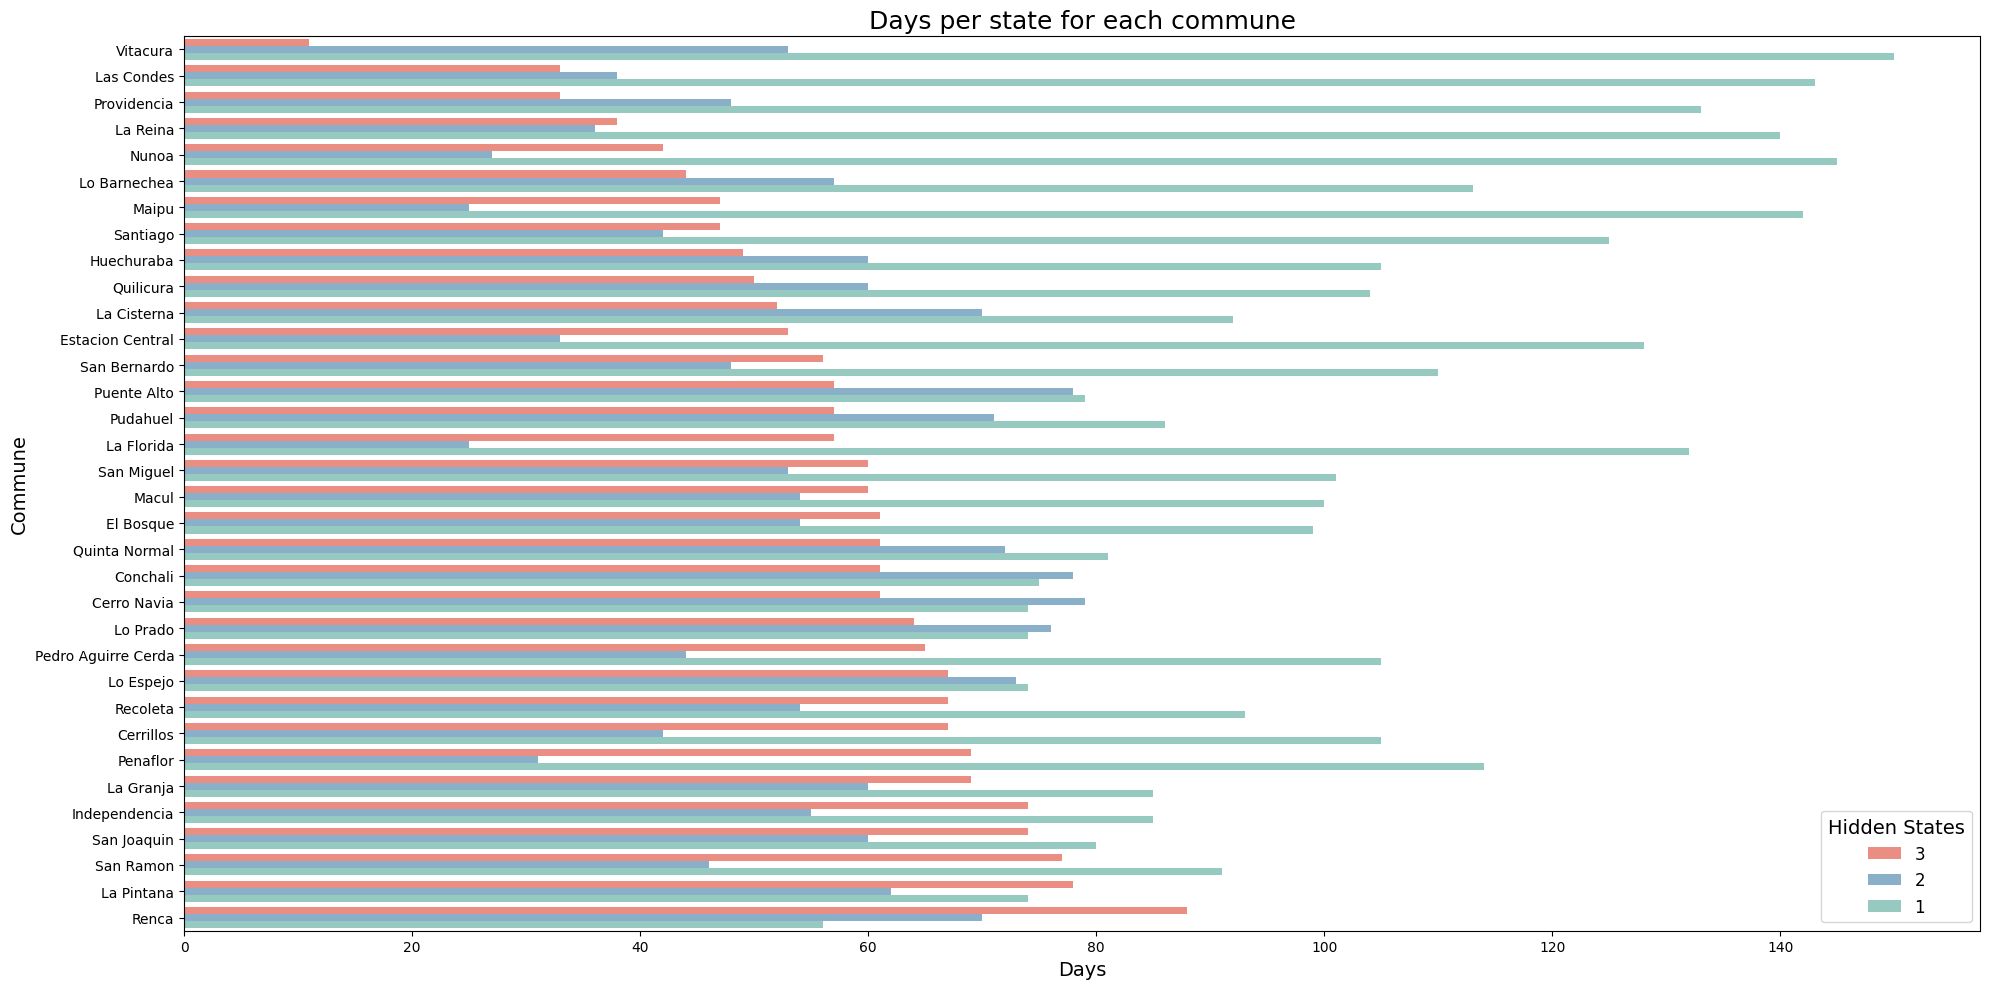

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar y ordenar las comunas según la cantidad de días en estado 3 (severo)
state_3_counts = state_count[state_count['Reordened_state'] == 3].groupby('Commune')['Days'].sum().sort_values()
sorted_communes = state_3_counts.index

# Reordenar la columna 'Commune' con las comunas ordenadas
state_count_sorted = state_count.copy()
state_count_sorted['Commune'] = pd.Categorical(state_count_sorted['Commune'], categories=sorted_communes, ordered=True)
state_count_sorted = state_count_sorted.sort_values('Commune')

# Convertir estado a string si no lo está
state_count_sorted['Reordened_state'] = state_count_sorted['Reordened_state'].astype(str)

# Definir la paleta de colores personalizada (como en el heatmap)
custom_palette = {
    '1': '#8dd3c7',  # State 1 (leve) – verde agua
    '2': '#80b1d3',  # State 2 (moderado) – azul
    '3': '#fb8072'   # State 3 (severo) – rojo salmón
}

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
sns.barplot(
    data=state_count_sorted,
    x='Days',
    y='Commune',
    orient='h',
    hue='Reordened_state',
    palette=custom_palette,
    dodge=True
)

# Ajustar títulos y etiquetas
plt.title('Days per state for each commune', fontsize=18)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Commune', fontsize=14)
plt.legend(title='Hidden States', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


## Transition probabilites between states:

In [43]:
# Extract the adjusted transition matrix
transition_matrix = r['slot'](hmm_fitted, "trDens")
print("\nAdjusted transition matrix:")
print(transition_matrix)


Adjusted transition matrix:
[[[9.88006681e-01 1.91888104e-03 7.73190168e-03]
  [1.05865720e-02 9.98081119e-01 1.69924865e-09]
  [1.40674676e-03 3.67625285e-16 9.92268097e-01]]

 [[9.81706807e-01 8.73606558e-04 8.87355680e-03]
  [1.75687684e-02 9.99126393e-01 2.41835625e-09]
  [7.24424308e-04 3.99844055e-17 9.91126441e-01]]

 [[9.62216407e-01 2.39731211e-04 1.01469551e-02]
  [3.75528065e-02 9.99760269e-01 3.91683534e-09]
  [2.30786421e-04 1.16159822e-18 9.89853041e-01]]

 ...

 [[2.16388780e-04 2.64861839e-11 4.27939964e-07]
  [2.62212712e-14 9.60740041e-20 2.18025280e-15]
  [9.99783611e-01 1.00000000e+00 9.99999572e-01]]

 [[1.98407498e-04 2.49488917e-11 4.48450043e-07]
  [2.39088527e-14 8.43894619e-20 2.24904641e-15]
  [9.99801593e-01 1.00000000e+00 9.99999552e-01]]

 [[9.83970738e-05 1.49492932e-11 6.45279779e-07]
  [1.11792612e-14 2.85247699e-20 2.84130650e-15]
  [9.99901603e-01 1.00000000e+00 9.99999355e-01]]]


In [44]:
# Restructure transition_matrix to obtain transition probabilities per sample
n_samples, n_states, _ = transition_matrix.shape

# Remapping state indexes
transitions_list = []
for t in range(n_samples):
    for i in range(n_states):
        for j in range(n_states):
            transitions_list.append({
                "sample": t,
                f"Trans_{i+1}->{j+1}": transition_matrix[t, i, j]  
            })

transitions_df = pd.DataFrame(transitions_list).groupby("sample").mean().reset_index(drop=True)

# Reordering State Transitions:
remap_transition_states = {'Trans_1->1':'Trans_2->2','Trans_1->2':'Trans_2->3','Trans_1->3':'Trans_2->1','Trans_2->2':'Trans_3->3','Trans_2->3':'Trans_3->1',
                           'Trans_3->1':'Trans_1->2','Trans_3->2':'Trans_1->3','Trans_3->3':'Trans_1->1','Trans_2->1':'Trans_3->2'}

# Apply transitions name mapping
transitions_df = transitions_df.rename(columns=remap_transition_states)



print("Structured transitions:")
print(transitions_df.head())


Structured transitions:
   Trans_2->2  Trans_2->3  Trans_2->1  Trans_3->2  Trans_3->3    Trans_3->1  \
0    0.988007    0.001919    0.007732    0.010587    0.998081  1.699249e-09   
1    0.981707    0.000874    0.008874    0.017569    0.999126  2.418356e-09   
2    0.962216    0.000240    0.010147    0.037553    0.999760  3.916835e-09   
3    0.984126    0.003281    0.015371    0.012664    0.996719  3.049639e-09   
4    0.890539    0.000056    0.017375    0.109388    0.999944  1.016508e-08   

   Trans_1->2    Trans_1->3  Trans_1->1  
0    0.001407  3.676253e-16    0.992268  
1    0.000724  3.998441e-17    0.991126  
2    0.000231  1.161598e-18    0.989853  
3    0.003209  6.806549e-16    0.984629  
4    0.000072  1.358643e-20    0.982625  


In [45]:
viterbi_merged.columns

Index(['state', 'S1', 'S2', 'S3', 'row_id', 'Internal_Mobility_Index',
       'External_Mobility_Index', 'Per_Capita_Income', 'Cumulative_Cases_Rate',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Commune', 'Date', 'Days',
       'Higher_Education_Percentage', 'Postgraduade_Percentage',
       'Social_Priority_Index_2020', 'Priority_2020', 'Code', 'Year', 'Month',
       'Step', 'Step_Label', 'Quarantine_Start_Date', 'Quarantine_End_Date',
       'Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days',
       'Connectivity_and_Mobility', 'Housing_and_Environment',
       'Labor_Conditions', 'Business_Environment', 'Health_and_Environment',
       'Socio_cultural_conditions', 'Urban_Quality_of_Life_Index_2024',
       'Reordened_state'],
      dtype='object')

In [46]:
# Selecting relevant covariates
covariates_df = viterbi_merged[[
    'Internal_Mobility_Index', 'External_Mobility_Index', 
    'Per_Capita_Income', 'Average_Household_Persons', 'Inmigrants', 
    'Total_Households_Housed', 'Housing_Precariousness_Index', 
    'Higher_Education_Percentage', 'Social_Priority_Index_2020',
    'Urban_Quality_of_Life_Index_2024'
]].reset_index(drop=True)

# Combine with transitions
analysis_df = pd.concat([covariates_df, transitions_df], axis=1)
print("Combined data for analysis:")
print(analysis_df.head())

Combined data for analysis:
   Internal_Mobility_Index  External_Mobility_Index  Per_Capita_Income  \
0                 1.970381                 7.804008          267197.56   
1                 1.845790                 7.471452          267197.56   
2                 1.678598                 6.891732          267197.56   
3                 1.736766                 8.317872          267197.56   
4                 1.331296                 6.378498          267197.56   

   Average_Household_Persons  Inmigrants  Total_Households_Housed  \
0                   3.145581        3606                    68120   
1                   3.145581        3606                    68120   
2                   3.145581        3606                    68120   
3                   3.145581        3606                    68120   
4                   3.145581        3606                    68120   

   Housing_Precariousness_Index  Higher_Education_Percentage  \
0                      3.395792                 

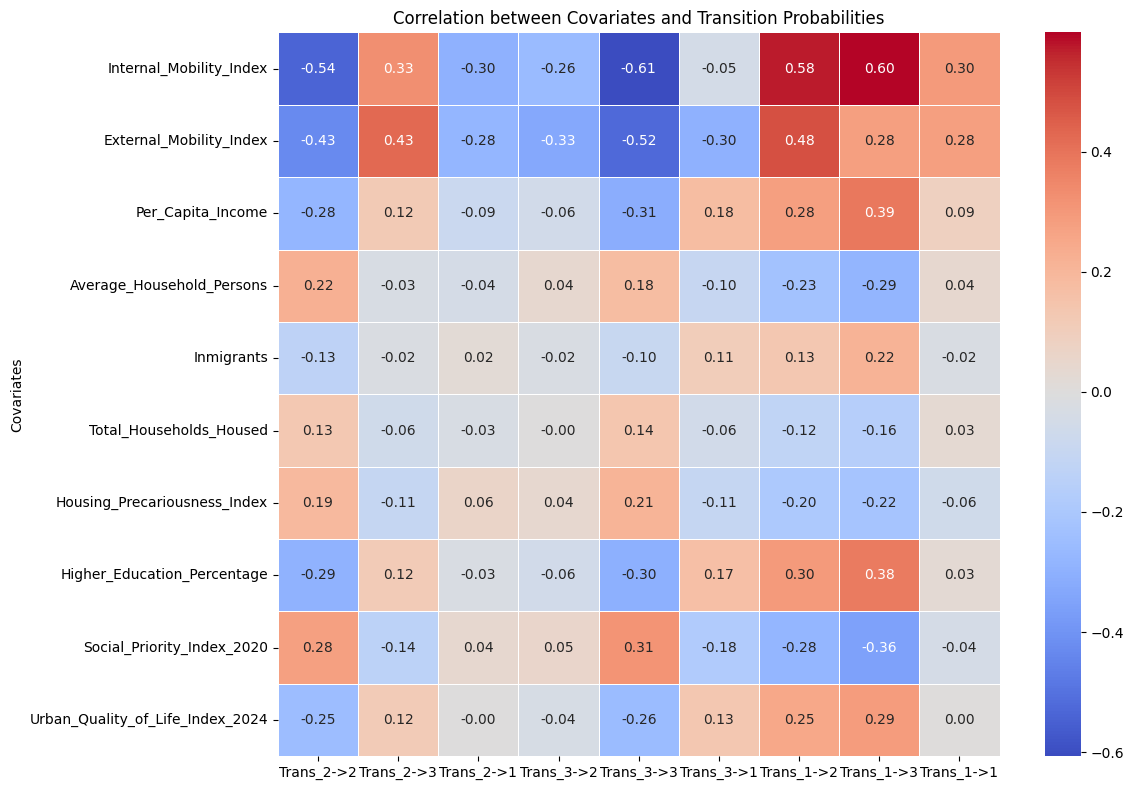

In [47]:
# Calculate the correlation matrix
correlations = analysis_df.corr().loc[
    covariates_df.columns, 
    transitions_df.columns
]

# Plot the heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Covariates and Transition Probabilities")
plt.xlabel(None)
plt.ylabel("Covariates")
plt.tight_layout()
plt.show()


In [48]:
viterbi_merged.columns

Index(['state', 'S1', 'S2', 'S3', 'row_id', 'Internal_Mobility_Index',
       'External_Mobility_Index', 'Per_Capita_Income', 'Cumulative_Cases_Rate',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Commune', 'Date', 'Days',
       'Higher_Education_Percentage', 'Postgraduade_Percentage',
       'Social_Priority_Index_2020', 'Priority_2020', 'Code', 'Year', 'Month',
       'Step', 'Step_Label', 'Quarantine_Start_Date', 'Quarantine_End_Date',
       'Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days',
       'Connectivity_and_Mobility', 'Housing_and_Environment',
       'Labor_Conditions', 'Business_Environment', 'Health_and_Environment',
       'Socio_cultural_conditions', 'Urban_Quality_of_Life_Index_2024',
       'Reordened_state'],
      dtype='object')

In [49]:

transitions = []


for idx, matriz in enumerate(transition_matrix):
    for from_state in range(len(matriz)):
        for to_state in range(len(matriz[from_state])):
            transitions.append({
                'Original_Day':  viterbi_merged.iloc[idx]['Days'],  # Original day on final basis
                'Correlative_Day': idx,  # Index or correlative day generated
                'Commune': viterbi_merged.iloc[idx]['Commune'],  # Commune associated to the day
                'from_state': from_state + 1,  
                'to_state': to_state + 1,     
                'probability': matriz[from_state][to_state]
            })

transitions_df = pd.DataFrame(transitions)

transitions_df['Transition'] = (
    "Trans_" + transitions_df['from_state'].astype(str) + "->" + transitions_df['to_state'].astype(str)
)




In [50]:
transitions_df.head()

Original_Day  Correlative_Day    Commune  from_state  to_state  probability  \
0   2020-04-02                0  Cerrillos           1         1     0.988007   
1   2020-04-02                0  Cerrillos           1         2     0.001919   
2   2020-04-02                0  Cerrillos           1         3     0.007732   
3   2020-04-02                0  Cerrillos           2         1     0.010587   
4   2020-04-02                0  Cerrillos           2         2     0.998081   

   Transition  
0  Trans_1->1  
1  Trans_1->2  
2  Trans_1->3  
3  Trans_2->1  
4  Trans_2->2

In [51]:
# Rearrange the states to match the desired interpretation:
remap_transition_states = {'Trans_1->1':'Trans_2->2','Trans_1->2':'Trans_2->3','Trans_1->3':'Trans_2->1','Trans_2->2':'Trans_3->3','Trans_2->3':'Trans_3->1',
                           'Trans_3->1':'Trans_1->2','Trans_3->2':'Trans_1->3','Trans_3->3':'Trans_1->1','Trans_2->1':'Trans_3->2'}

transitions_df['Reordened_Transition'] = transitions_df['Transition'].map(remap_transition_states)

In [52]:
# Pivot to have the transitions as columns
transitions_df = transitions_df.pivot(
    index=['Commune', 'Original_Day', 'Correlative_Day'],  # Add both day references
    columns='Reordened_Transition',
    values='probability'
).reset_index()


print("DataFrame of transitions updated:")
print(transitions_df.head())


DataFrame of transitions updated:
Reordened_Transition    Commune Original_Day  Correlative_Day  Trans_1->1  \
0                     Cerrillos   2020-04-02                0    0.992268   
1                     Cerrillos   2020-04-03                1    0.991126   
2                     Cerrillos   2020-04-04                2    0.989853   
3                     Cerrillos   2020-04-05                3    0.984629   
4                     Cerrillos   2020-04-06                4    0.982625   

Reordened_Transition  Trans_1->2    Trans_1->3  Trans_2->1  Trans_2->2  \
0                       0.001407  3.676253e-16    0.007732    0.988007   
1                       0.000724  3.998441e-17    0.008874    0.981707   
2                       0.000231  1.161598e-18    0.010147    0.962216   
3                       0.003209  6.806549e-16    0.015371    0.984126   
4                       0.000072  1.358643e-20    0.017375    0.890539   

Reordened_Transition  Trans_2->3    Trans_3->1  Trans_3->2

In [53]:
transitions_df.columns

Index(['Commune', 'Original_Day', 'Correlative_Day', 'Trans_1->1',
       'Trans_1->2', 'Trans_1->3', 'Trans_2->1', 'Trans_2->2', 'Trans_2->3',
       'Trans_3->1', 'Trans_3->2', 'Trans_3->3'],
      dtype='object', name='Reordened_Transition')

In [54]:
# Convert transitions to “long” format
transitions_long = pd.melt(
    transitions_df,
    id_vars=['Commune', 'Original_Day', 'Correlative_Day'],  # Include both columns of days
    value_vars=['Trans_1->1', 'Trans_1->2', 'Trans_1->3', 
                'Trans_2->1', 'Trans_2->2', 'Trans_2->3', 
                'Trans_3->1', 'Trans_3->2', 'Trans_3->3'],
    var_name='Transition',
    value_name='Probability_Transition'
)

# Perform the merge to add the covariables from base_final
lmm_data = transitions_long.merge(
    viterbi_merged[['Commune', 'Days', 'Internal_Mobility_Index', 'External_Mobility_Index', 'Cumulative_Cases_Rate', 
                'Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days', 'Per_Capita_Income',
                'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed', 
                'Housing_Precariousness_Index', 'Higher_Education_Percentage', 'Social_Priority_Index_2020']],
    left_on=['Commune', 'Original_Day'],  # Use Original_day to match base_final
    right_on=['Commune', 'Days'],         # The column in base_final is ‘days’.
    how='left'
)


print("Data prepared for LMM (in long format with additional covariates):")
print(lmm_data.head())


Data prepared for LMM (in long format with additional covariates):
     Commune Original_Day  Correlative_Day  Transition  \
0  Cerrillos   2020-04-02                0  Trans_1->1   
1  Cerrillos   2020-04-03                1  Trans_1->1   
2  Cerrillos   2020-04-04                2  Trans_1->1   
3  Cerrillos   2020-04-05                3  Trans_1->1   
4  Cerrillos   2020-04-06                4  Trans_1->1   

   Probability_Transition       Days  Internal_Mobility_Index  \
0                0.992268 2020-04-02                 1.970381   
1                0.991126 2020-04-03                 1.845790   
2                0.989853 2020-04-04                 1.678598   
3                0.984629 2020-04-05                 1.736766   
4                0.982625 2020-04-06                 1.331296   

   External_Mobility_Index  Cumulative_Cases_Rate  Gross_Daily_Cases  \
0                 7.804008               2.248303           2.248303   
1                 7.471452               4.496605

In [55]:
# Perform the merge to add the covariables from base_final
lmm_data = transitions_long.merge(
    viterbi_merged[['Commune', 'Days', 'Internal_Mobility_Index', 'External_Mobility_Index', 'Cumulative_Cases_Rate', 
                'Gross_Daily_Cases', 'Gross_Daily_Cases_Mobile_Average_7_Days', 'Per_Capita_Income',
                'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed', 
                'Housing_Precariousness_Index', 'Higher_Education_Percentage', 'Social_Priority_Index_2020',
                'Urban_Quality_of_Life_Index_2024']],
    left_on=['Commune', 'Original_Day'],  # Use Original_day to match base_final
    right_on=['Commune', 'Days'],         # The column in base_final is ‘days’.
    how='left'
)


print("Data prepared for LMM (in long format with additional covariates):")
print(lmm_data.head())

Data prepared for LMM (in long format with additional covariates):
     Commune Original_Day  Correlative_Day  Transition  \
0  Cerrillos   2020-04-02                0  Trans_1->1   
1  Cerrillos   2020-04-03                1  Trans_1->1   
2  Cerrillos   2020-04-04                2  Trans_1->1   
3  Cerrillos   2020-04-05                3  Trans_1->1   
4  Cerrillos   2020-04-06                4  Trans_1->1   

   Probability_Transition       Days  Internal_Mobility_Index  \
0                0.992268 2020-04-02                 1.970381   
1                0.991126 2020-04-03                 1.845790   
2                0.989853 2020-04-04                 1.678598   
3                0.984629 2020-04-05                 1.736766   
4                0.982625 2020-04-06                 1.331296   

   External_Mobility_Index  Cumulative_Cases_Rate  Gross_Daily_Cases  \
0                 7.804008               2.248303           2.248303   
1                 7.471452               4.496605

In [56]:
lmm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65484 entries, 0 to 65483
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Commune                                  65484 non-null  object        
 1   Original_Day                             65484 non-null  datetime64[ns]
 2   Correlative_Day                          65484 non-null  int64         
 3   Transition                               65484 non-null  object        
 4   Probability_Transition                   65484 non-null  float64       
 5   Days                                     65484 non-null  datetime64[ns]
 6   Internal_Mobility_Index                  65484 non-null  float64       
 7   External_Mobility_Index                  65484 non-null  float64       
 8   Cumulative_Cases_Rate                    65484 non-null  float64       
 9   Gross_Daily_Cases                      

In [57]:
lmm_data.columns

Index(['Commune', 'Original_Day', 'Correlative_Day', 'Transition',
       'Probability_Transition', 'Days', 'Internal_Mobility_Index',
       'External_Mobility_Index', 'Cumulative_Cases_Rate', 'Gross_Daily_Cases',
       'Gross_Daily_Cases_Mobile_Average_7_Days', 'Per_Capita_Income',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Higher_Education_Percentage',
       'Social_Priority_Index_2020', 'Urban_Quality_of_Life_Index_2024'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

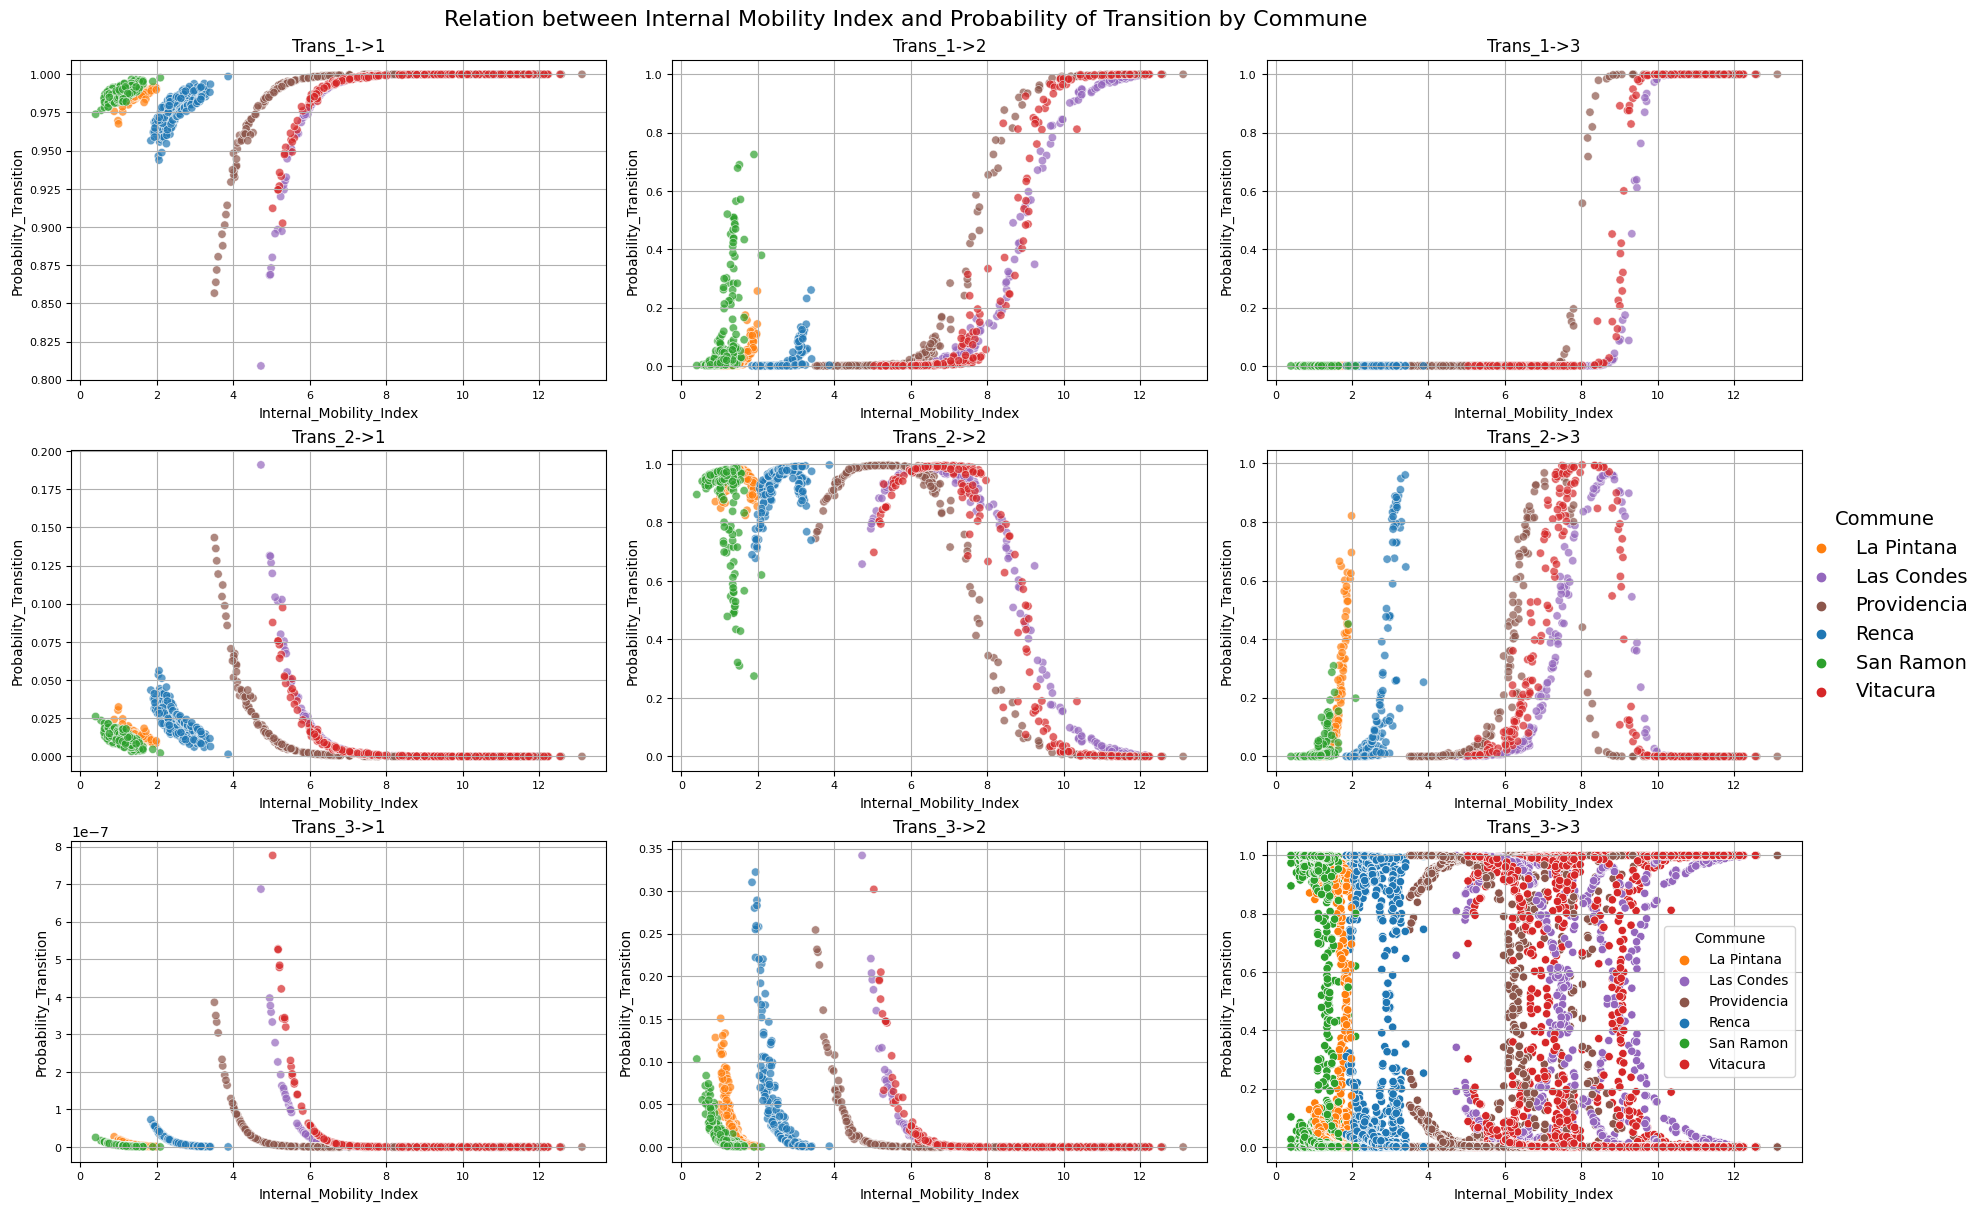

In [58]:
# Filtrar los datos para las comunas específicas
filtered_communes = lmm_data[(lmm_data['Commune'] == 'Renca') | (lmm_data['Commune'] == 'La Pintana') | (lmm_data['Commune'] == 'San Ramon') | (lmm_data['Commune'] == 'Vitacura') | (lmm_data['Commune'] == 'Las Condes')| (lmm_data['Commune'] == 'Providencia')]

# Lista de transiciones únicas
transiciones_unicas = filtered_communes['Transition'].unique()
# Define a custom palette with one specific color correction
custom_palette = {
    'Renca': '#1f77b4',          # Blue
    'La Pintana': '#ff7f0e',     # Orange
    'San Ramon': '#2ca02c',      # Green
    'Vitacura': '#d62728',       # Bright Red
    'Las Condes': '#9467bd',     # Purple
    'Providencia': '#8c564b'     # Dark Brown
}
# Filtrar los datos para las comunas específicas
filtered_communes = lmm_data[lmm_data['Commune'].isin(custom_palette.keys())]



# Configurar la figura con subplots
num_transiciones = len(transiciones_unicas)
fig, axes = plt.subplots(
    nrows=(num_transiciones + 2) // 3,  # Filas (3 gráficos por fila)
    ncols=3,  # Columnas
    figsize=(18, 12),
    constrained_layout=True
)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos separados por transición
for i, transicion in enumerate(transiciones_unicas):
    sns.scatterplot(
        data=filtered_communes[filtered_communes['Transition'] == transicion],
        x='Internal_Mobility_Index',
        y='Probability_Transition',
        hue='Commune',  # Color basado en la comuna
        palette=custom_palette,  # Use the custom color palette
        alpha=0.7,
        legend=False,  # Eliminar leyendas de los subplots individuales
        ax=axes[i]
    )
    axes[i].set_title(f'{transicion}', fontsize=12)
    axes[i].set_xlabel('Internal_Mobility_Index', fontsize=10)
    axes[i].set_ylabel('Probability_Transition', fontsize=10)
    axes[i].grid(True)
    axes[i].tick_params(axis='both', labelsize=8)

# Crear una única leyenda para toda la figura
handles, labels = sns.scatterplot(
    data=filtered_communes,
    x='Internal_Mobility_Index',
    y='Probability_Transition',
    hue='Commune',
    palette=custom_palette,  # Use the custom color palette
    legend=True
).get_legend_handles_labels()

fig.legend(
    handles, labels, loc='center right', title='Commune',
    fontsize=14, title_fontsize=14, bbox_to_anchor=(1.1, 0.5),
    frameon=False  # Agregar un cuadro a la leyenda
)

# Ajustar el espacio entre gráficos y la leyenda
plt.subplots_adjust(right=1.5)  # Dar más espacio horizontal para la leyenda

# Deshabilitar los subplots vacíos si hay más ejes que gráficos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Título general
fig.suptitle('Relation between Internal Mobility Index and Probability of Transition by Commune', fontsize=16)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

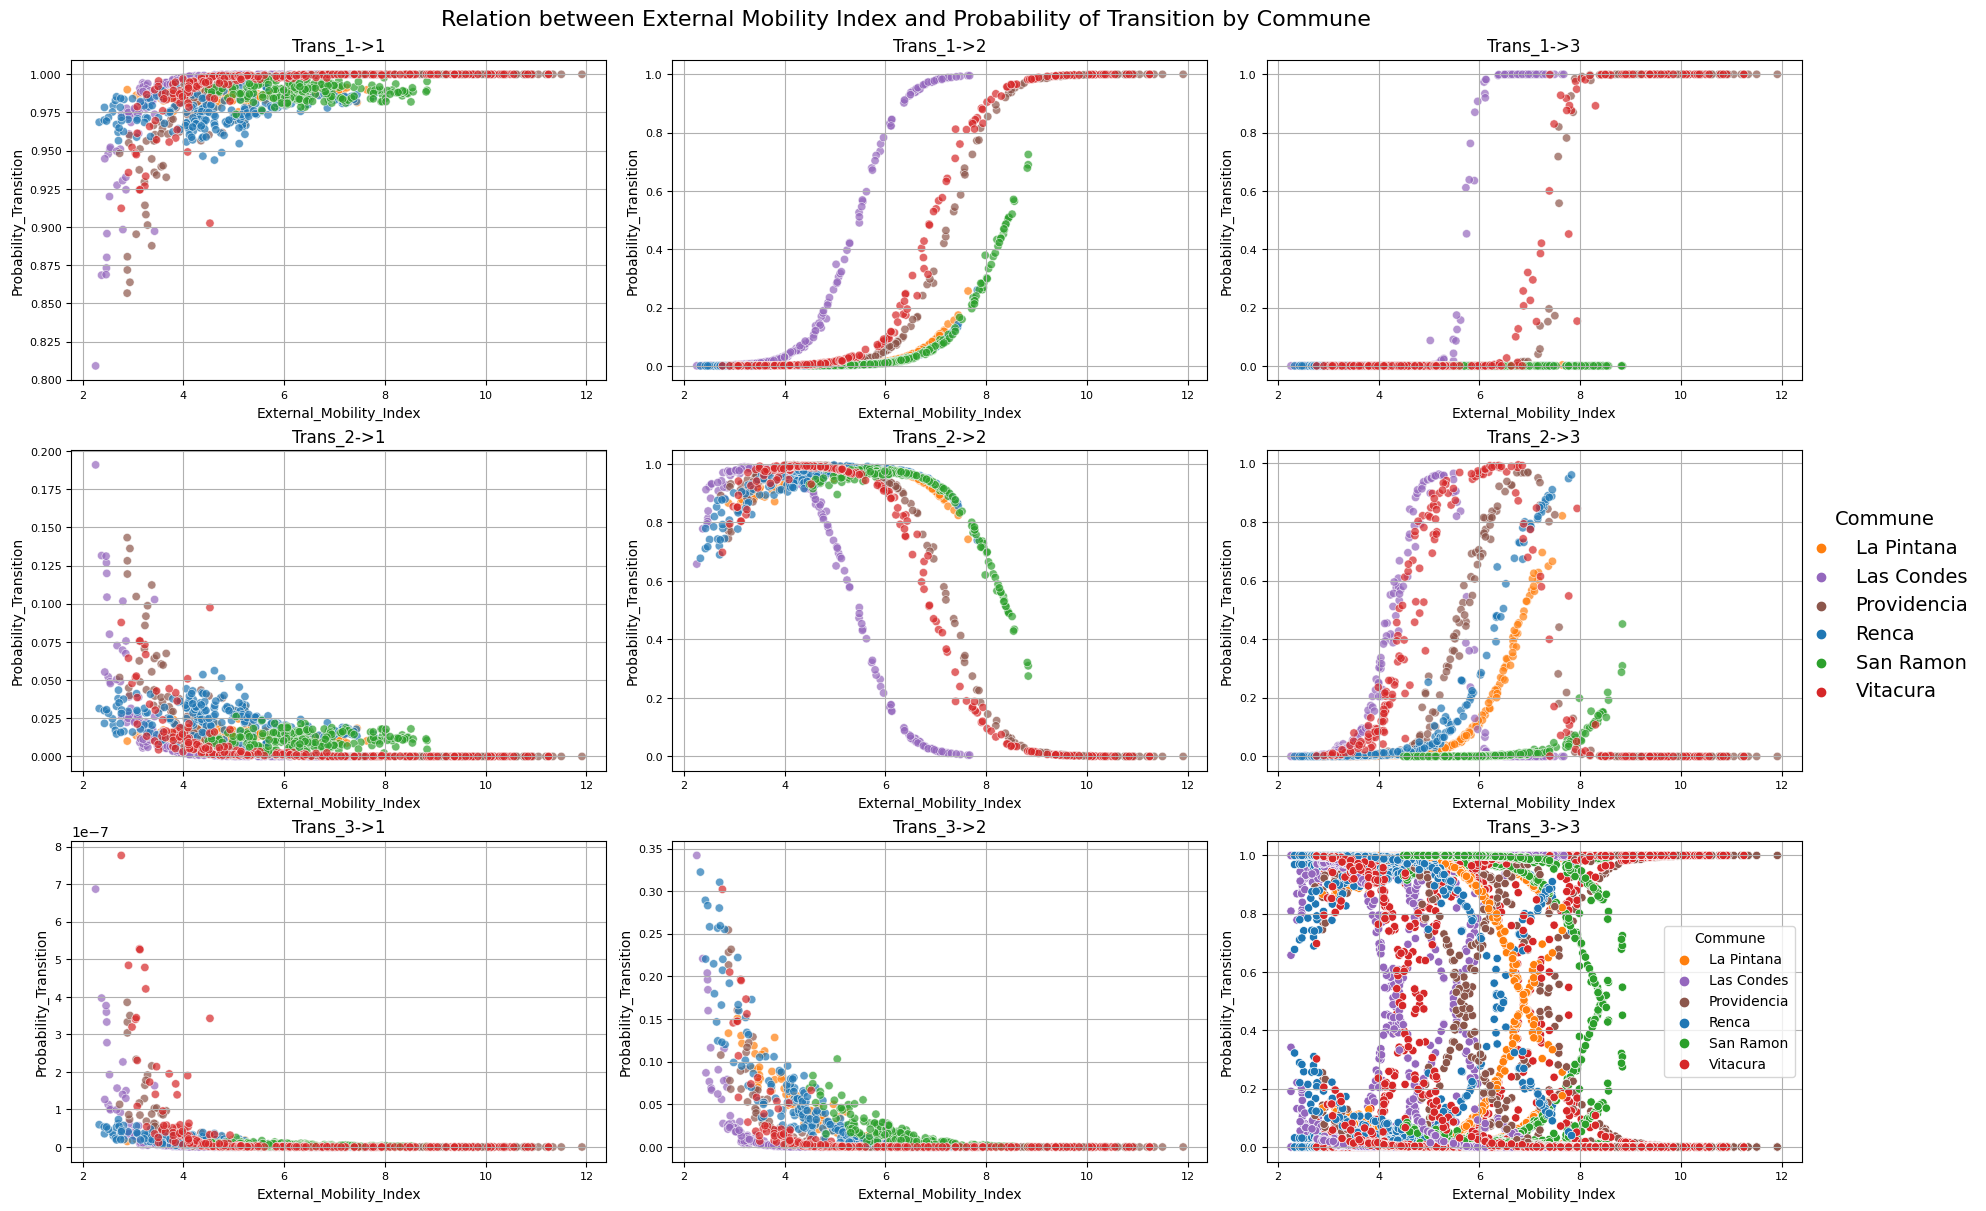

In [59]:
# Filtrar los datos para las comunas específicas
filtered_communes = lmm_data[(lmm_data['Commune'] == 'Renca') | (lmm_data['Commune'] == 'La Pintana') | (lmm_data['Commune'] == 'San Ramon') | (lmm_data['Commune'] == 'Vitacura') | (lmm_data['Commune'] == 'Las Condes')| (lmm_data['Commune'] == 'Providencia')]

# Lista de transiciones únicas
transiciones_unicas = filtered_communes['Transition'].unique()
# Define a custom palette with one specific color correction
custom_palette = {
    'Renca': '#1f77b4',          # Blue
    'La Pintana': '#ff7f0e',     # Orange
    'San Ramon': '#2ca02c',      # Green
    'Vitacura': '#d62728',       # Bright Red
    'Las Condes': '#9467bd',     # Purple
    'Providencia': '#8c564b'     # Dark Brown
}
# Filtrar los datos para las comunas específicas
filtered_communes = lmm_data[lmm_data['Commune'].isin(custom_palette.keys())]



# Configurar la figura con subplots
num_transiciones = len(transiciones_unicas)
fig, axes = plt.subplots(
    nrows=(num_transiciones + 2) // 3,  # Filas (3 gráficos por fila)
    ncols=3,  # Columnas
    figsize=(18, 12),
    constrained_layout=True
)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos separados por transición
for i, transicion in enumerate(transiciones_unicas):
    sns.scatterplot(
        data=filtered_communes[filtered_communes['Transition'] == transicion],
        x='External_Mobility_Index',
        y='Probability_Transition',
        hue='Commune',  # Color basado en la comuna
        palette=custom_palette,  # Use the custom color palette
        alpha=0.7,
        legend=False,  # Eliminar leyendas de los subplots individuales
        ax=axes[i]
    )
    axes[i].set_title(f'{transicion}', fontsize=12)
    axes[i].set_xlabel('External_Mobility_Index', fontsize=10)
    axes[i].set_ylabel('Probability_Transition', fontsize=10)
    axes[i].grid(True)
    axes[i].tick_params(axis='both', labelsize=8)

# Crear una única leyenda para toda la figura
handles, labels = sns.scatterplot(
    data=filtered_communes,
    x='External_Mobility_Index',
    y='Probability_Transition',
    hue='Commune',
    palette=custom_palette,  # Use the custom color palette
    legend=True
).get_legend_handles_labels()

fig.legend(
    handles, labels, loc='center right', title='Commune',
    fontsize=14, title_fontsize=14, bbox_to_anchor=(1.1, 0.5),
    frameon=False  # Agregar un cuadro a la leyenda
)

# Ajustar el espacio entre gráficos y la leyenda
plt.subplots_adjust(right=1.5)  # Dar más espacio horizontal para la leyenda

# Deshabilitar los subplots vacíos si hay más ejes que gráficos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Título general
fig.suptitle('Relation between External Mobility Index and Probability of Transition by Commune', fontsize=16)
plt.show()

_______________

## LMM

In [2]:
# Cargar librerías necesarias
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pymer4.models import Lmer

# Asegurarnos de que los datos estén correctamente formateados
lmm_data['Commune'] = lmm_data['Commune'].astype('category')  # Comuna como categoría

# Inspeccionar la estructura de los datos
print(lmm_data.info())
print(lmm_data.head())

NameError: name 'lmm_data' is not defined

In [61]:
lmm_data.columns

Index(['Commune', 'Original_Day', 'Correlative_Day', 'Transition',
       'Probability_Transition', 'Days', 'Internal_Mobility_Index',
       'External_Mobility_Index', 'Cumulative_Cases_Rate', 'Gross_Daily_Cases',
       'Gross_Daily_Cases_Mobile_Average_7_Days', 'Per_Capita_Income',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Higher_Education_Percentage',
       'Social_Priority_Index_2020', 'Urban_Quality_of_Life_Index_2024'],
      dtype='object')

In [62]:
from pymer4.models import Lmer
import pandas as pd

In [63]:
lmm_data.columns

Index(['Commune', 'Original_Day', 'Correlative_Day', 'Transition',
       'Probability_Transition', 'Days', 'Internal_Mobility_Index',
       'External_Mobility_Index', 'Cumulative_Cases_Rate', 'Gross_Daily_Cases',
       'Gross_Daily_Cases_Mobile_Average_7_Days', 'Per_Capita_Income',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Higher_Education_Percentage',
       'Social_Priority_Index_2020', 'Urban_Quality_of_Life_Index_2024'],
      dtype='object')

In [64]:
# Environment Setup
import os
os.environ["R_HOME"] = r"/Library/Frameworks/R.framework/Resources"

import numpy as np
import pandas as pd
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import IntVector

pandas2ri.activate()

# Import R packages
base = importr('base')
utils = importr('utils')
lme4 = importr('lme4')
hrbrthemes = importr('hrbrthemes')
ggplot2 = importr('ggplot2')
dplyr = importr('dplyr')
tidyr = importr('tidyr')
ggthemes = importr('ggthemes')
ggpubr = importr('ggpubr')
ggsci = importr('ggsci')
viridis = importr('viridis')
sf = importr('sf')

# Seeds for reproducibility
r('set.seed(2030)')
np.random.seed(2030)

# LMM Transiciones

## LMM Transición 1->2

### Modelo A Movilidad: Transición 1->2


In [85]:
specific_transition_1_2 = 'Trans_1->2'
transition_data_1_2 = lmm_data[lmm_data['Transition'] == specific_transition_1_2]


In [86]:
transition_data_1_2['Commune'] = transition_data_1_2['Commune'].astype('category')


/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_58057/1635946703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_1_2['Commune'] = transition_data_1_2['Commune'].astype('category')


In [87]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_1_2)
r.assign("transition_data_1_2", r_data)

<rpy2.robjects.vectors.DataFrame object at 0x32e586540> [RTYPES.VECSXP]
R classes: ('data.frame',)
[IntSexpVe..., FloatSexp..., IntSexpVe..., StrSexpVe..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  Commune: <class 'rpy2.robjects.vectors.FactorVector'>
  <rpy2.robjects.vectors.FactorVector object at 0x32e6ecc00> [RTYPES.INTSXP]
R classes: ('factor',)
[Cerri..., Cerri..., Cerri..., Cerri..., ..., Vitac..., Vitac..., Vitac..., Vitac...]
  Original_Day: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
  DatetimeIndex(['2020-04-02 00:00:00-03:00', '2020-04-03 00:00:00-03:00',
               '2020-04-04 00:00:00-03:00', '2020-04-05 00:00:00-04:00',
               '2020-04-06 00:00:00-04:00', '2020-04-07 00:00:00-04:00',
               '2020-04-08 00:00:00-04:00', '2020-04-09 00:00:00-04:00',
               '2020-04-10 00:00:00-04:00', '2020-04-11 00:00:00-04:00',
               ...
               '2020-10-23 00:00:00-03:00', '2020-10-24 00:00:00-03:00',
               '2020-10-25 00:00:00-03:00', '2020-10-26 00:00:00-03:00',
               '2020-10-27 00:00:00-03:00', '2020-10-28 00:00:00-03:00',
               '2020-10-29 00:00:00-03:00', '2020-10-30 00:00:00-03:00',
               '2020-10-31 00:00:00-03:00', '2020-11-01 00:00:00-03:00'],
              dtype='datetime64[ns, America/Santiago]', length=7276, freq=None)
  Correlative_Day: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x32e6ecf80> [RTYPES.INTSXP]
R classes: ('integer',)
[0, 1, 2, 3, ..., 7272, 7273, 7274, 7275]
  Transition: <class 'numpy.ndarray'>
  array(['Trans_1->2', 'Trans_1->2', 'Trans_1->2', ..., 'Trans_1->2',
       'Trans_1->2', 'Trans_1->2'], dtype='<U10')
...
  Days: <class 'numpy.ndarray'>
  array([3.3957924, 3.3957924, 3.3957924, ..., 0.0869822, 0.0869822,
       0.0869822])
  Internal_Mobility_Index: <class 'numpy.ndarray'>
  array([11.9, 11.9, 11.9, ..., 53.2, 53.2, 53.2])
  External_Mobility_Index: <class 'numpy.ndarray'>
  array([67.81, 67.81, 67.81, ...,  7.94,  7.94,  7.94])
  Cumulative_Cases_Rate: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x321d8cdc0> [RTYPES.INTSXP]
R classes: ('integer',)
[16, 16, 16, 16, ..., 21, 21, 21, 21]

In [95]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Ajustar el modelo LMM con solo movilidad
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_trans_1_2 <- lmer(
  Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +
  (Internal_Mobility_Index + External_Mobility_Index | Commune),
  data = transition_data_1_2,
  control = control
)

# Mostrar resumen con p-values
summary_text <- capture.output(summary(model_trans_1_2))
writeLines(summary_text)
''')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_1_2
Control: control

REML criterion at convergence: -12292.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6575 -0.5798 -0.0798  0.4670  5.5393 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.101356 0.31836             
          Internal_Mobility_Index 0.007213 0.08493  -0.46      
          External_Mobility_Index 0.006732 0.08205  -0.44 -0.45
 Residual                         0.010097 0.10049             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)             -0.56914    0.05507 32.89711 -10.335 7.30e-12 ***
Internal_Mobility_Index  0.

In [98]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_trans_1_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)


R2_marginal  R2_conditional
1     0.251618        0.942271

### Modelo B Movilidad + Sociodemográficas: Transición 1->2
Ingreso Per Cápita + Hacinamiento + Precariedad Vivienda + Porcentaje Educación

In [69]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_1_2$Internal_Mobility_Index <- scale(transition_data_1_2$Internal_Mobility_Index)
transition_data_1_2$External_Mobility_Index <- scale(transition_data_1_2$External_Mobility_Index)
transition_data_1_2$Per_Capita_Income <- scale(transition_data_1_2$Per_Capita_Income)
transition_data_1_2$Total_Households_Housed <- scale(transition_data_1_2$Total_Households_Housed)
transition_data_1_2$Housing_Precariousness_Index <- scale(transition_data_1_2$Housing_Precariousness_Index)
transition_data_1_2$Higher_Education_Percentage <- scale(transition_data_1_2$Higher_Education_Percentage)

library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_soc_1_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + (Internal_Mobility_Index + External_Mobility_Index  + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune), data = transition_data_1_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_soc_1_2))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_1_2
Control: control

REML criterion at convergence: -12349.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7095 -0.5766 -0.0831  0.4644  5.5174 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.018367 0.13552                   
          Internal_Mobility_Index      0.031430 0.17729   0.62            
          External_Mobility_Index      0.033955 0.18427   0.36 -0.49      
          Per_Ca

In [99]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_soc_1_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.247238        0.927196

In [70]:
lmm_data.columns

Index(['Commune', 'Original_Day', 'Correlative_Day', 'Transition',
       'Probability_Transition', 'Days', 'Internal_Mobility_Index',
       'External_Mobility_Index', 'Cumulative_Cases_Rate', 'Gross_Daily_Cases',
       'Gross_Daily_Cases_Mobile_Average_7_Days', 'Per_Capita_Income',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Higher_Education_Percentage',
       'Social_Priority_Index_2020', 'Urban_Quality_of_Life_Index_2024'],
      dtype='object')

### Modelo de prueba con Movilidad + IPS: Transición 1->2

In [100]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_1_2$Internal_Mobility_Index <- scale(transition_data_1_2$Internal_Mobility_Index)
transition_data_1_2$External_Mobility_Index <- scale(transition_data_1_2$External_Mobility_Index)
transition_data_1_2$Social_Priority_Index_2020 <- scale(transition_data_1_2$Social_Priority_Index_2020)


library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_IPS_1_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Social_Priority_Index_2020 + (Internal_Mobility_Index + External_Mobility_Index + Social_Priority_Index_2020 | Commune), data = transition_data_1_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_IPS_1_2))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Social_Priority_Index_2020 + (Internal_Mobility_Index + External_Mobility_Index +  
    Social_Priority_Index_2020 | Commune)
   Data: transition_data_1_2
Control: control

REML criterion at convergence: -12307.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6632 -0.5792 -0.0817  0.4635  5.5489 

Random effects:
 Groups   Name                       Variance Std.Dev. Corr             
 Commune  (Intercept)                0.04876  0.2208                    
          Internal_Mobility_Index    0.03095  0.1759    0.00            
          External_Mobility_Index    0.03272  0.1809    0.62 -0.47      
          Social_Priority_Index_2020 0.04073  0.2018   -0.68  0.73 -0.73
 Residual                            0.01010  0.1005                    
Number of obs: 7276, groups:  Commune, 34

Fixed ef

In [101]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_IPS_1_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.254254        0.934816

### Modelo C Movilidad + Calidad Urbana: Transición 1->2

In [102]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_1_2$Internal_Mobility_Index <- scale(transition_data_1_2$Internal_Mobility_Index)
transition_data_1_2$External_Mobility_Index <- scale(transition_data_1_2$External_Mobility_Index)
transition_data_1_2$Urban_Quality_of_Life_Index_2024 <- scale(transition_data_1_2$Urban_Quality_of_Life_Index_2024)


library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_Calidad_Urb_1_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 | Commune), data = transition_data_1_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_Calidad_Urb_1_2))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index +  
    External_Mobility_Index + Urban_Quality_of_Life_Index_2024 |      Commune)
   Data: transition_data_1_2
Control: control

REML criterion at convergence: -12308.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6708 -0.5804 -0.0829  0.4640  5.5173 

Random effects:
 Groups   Name                             Variance Std.Dev. Corr             
 Commune  (Intercept)                      0.03071  0.1752                    
          Internal_Mobility_Index          0.03089  0.1758    0.32            
          External_Mobility_Index          0.03195  0.1787    0.36 -0.47      
          Urban_Quality_of_Life_Index_2024 0.02434  0.1560    0.23 -0.84  0.73
 Residual                                  0.01010  0.1005                   

In [103]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_Calidad_Urb_1_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.307069         0.92269

In [104]:
lmm_data.columns

Index(['Commune', 'Original_Day', 'Correlative_Day', 'Transition',
       'Probability_Transition', 'Days', 'Internal_Mobility_Index',
       'External_Mobility_Index', 'Cumulative_Cases_Rate', 'Gross_Daily_Cases',
       'Gross_Daily_Cases_Mobile_Average_7_Days', 'Per_Capita_Income',
       'Average_Household_Persons', 'Inmigrants', 'Total_Households_Housed',
       'Housing_Precariousness_Index', 'Higher_Education_Percentage',
       'Social_Priority_Index_2020', 'Urban_Quality_of_Life_Index_2024'],
      dtype='object')

### Modelo de Prueba con Movilidad + Todas las Sociodemográficas: Transición 1->2

In [106]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_1_2$Internal_Mobility_Index <- scale(transition_data_1_2$Internal_Mobility_Index)
transition_data_1_2$External_Mobility_Index <- scale(transition_data_1_2$External_Mobility_Index)
transition_data_1_2$Per_Capita_Income <- scale(transition_data_1_2$Per_Capita_Income)
transition_data_1_2$Total_Households_Housed <- scale(transition_data_1_2$Total_Households_Housed)
transition_data_1_2$Housing_Precariousness_Index <- scale(transition_data_1_2$Housing_Precariousness_Index)
transition_data_1_2$Higher_Education_Percentage <- scale(transition_data_1_2$Higher_Education_Percentage)
transition_data_1_2$Average_Household_Persons <- scale(transition_data_1_2$Average_Household_Persons)
transition_data_1_2$Inmigrants <- scale(transition_data_1_2$Inmigrants)

library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_soc_todas_1_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + Inmigrants + Average_Household_Persons + (Internal_Mobility_Index + External_Mobility_Index  + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + Inmigrants + Average_Household_Persons | Commune), data = transition_data_1_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_soc_todas_1_2))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + Inmigrants + Average_Household_Persons +  
    (Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income +  
        Total_Households_Housed + Housing_Precariousness_Index +  
        Higher_Education_Percentage + Inmigrants + Average_Household_Persons |  
        Commune)
   Data: transition_data_1_2
Control: control

REML criterion at convergence: -12359.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8878 -0.5782 -0.0821  0.4612  5.5148 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.012340 0.11109                   
          Internal_Mobility_Index      0.033294 0.18247   0.70   

R[write to console]: Además: 
R[write to console]: Aviso:

R[write to console]: Model failed to converge with 2 negative eigenvalues: -1.3e+00 -2.1e+02 



In [107]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_soc_todas_1_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.247729        0.937651

## LMM Transición 2->3

### Modelo A Movilidad: Transición 2->3

In [108]:
specific_transition_2_3 = 'Trans_2->3'
transition_data_2_3 = lmm_data[lmm_data['Transition'] == specific_transition_2_3]


In [109]:
transition_data_2_3['Commune'] = transition_data_2_3['Commune'].astype('category')


/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_58057/2940721469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_2_3['Commune'] = transition_data_2_3['Commune'].astype('category')


In [110]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_2_3)
r.assign("transition_data_2_3", r_data)

<rpy2.robjects.vectors.DataFrame object at 0x32e6edec0> [RTYPES.VECSXP]
R classes: ('data.frame',)
[IntSexpVe..., FloatSexp..., IntSexpVe..., StrSexpVe..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  Commune: <class 'rpy2.robjects.vectors.FactorVector'>
  <rpy2.robjects.vectors.FactorVector object at 0x31fd48840> [RTYPES.INTSXP]
R classes: ('factor',)
[Cerri..., Cerri..., Cerri..., Cerri..., ..., Vitac..., Vitac..., Vitac..., Vitac...]
  Original_Day: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
  DatetimeIndex(['2020-04-02 00:00:00-03:00', '2020-04-03 00:00:00-03:00',
               '2020-04-04 00:00:00-03:00', '2020-04-05 00:00:00-04:00',
               '2020-04-06 00:00:00-04:00', '2020-04-07 00:00:00-04:00',
               '2020-04-08 00:00:00-04:00', '2020-04-09 00:00:00-04:00',
               '2020-04-10 00:00:00-04:00', '2020-04-11 00:00:00-04:00',
               ...
               '2020-10-23 00:00:00-03:00', '2020-10-24 00:00:00-03:00',
               '2020-10-25 00:00:00-03:00', '2020-10-26 00:00:00-03:00',
               '2020-10-27 00:00:00-03:00', '2020-10-28 00:00:00-03:00',
               '2020-10-29 00:00:00-03:00', '2020-10-30 00:00:00-03:00',
               '2020-10-31 00:00:00-03:00', '2020-11-01 00:00:00-03:00'],
              dtype='datetime64[ns, America/Santiago]', length=7276, freq=None)
  Correlative_Day: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x3139ccac0> [RTYPES.INTSXP]
R classes: ('integer',)
[0, 1, 2, 3, ..., 7272, 7273, 7274, 7275]
  Transition: <class 'numpy.ndarray'>
  array(['Trans_2->3', 'Trans_2->3', 'Trans_2->3', ..., 'Trans_2->3',
       'Trans_2->3', 'Trans_2->3'], dtype='<U10')
...
  Days: <class 'numpy.ndarray'>
  array([3.3957924, 3.3957924, 3.3957924, ..., 0.0869822, 0.0869822,
       0.0869822])
  Internal_Mobility_Index: <class 'numpy.ndarray'>
  array([11.9, 11.9, 11.9, ..., 53.2, 53.2, 53.2])
  External_Mobility_Index: <class 'numpy.ndarray'>
  array([67.81, 67.81, 67.81, ...,  7.94,  7.94,  7.94])
  Cumulative_Cases_Rate: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x311365880> [RTYPES.INTSXP]
R classes: ('integer',)
[16, 16, 16, 16, ..., 21, 21, 21, 21]

In [111]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Ajustar el modelo LMM con solo movilidad
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_trans_2_3 <- lmer(
  Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +
  (Internal_Mobility_Index + External_Mobility_Index | Commune),
  data = transition_data_2_3,
  control = control
)

# Mostrar resumen con p-values
summary_text <- capture.output(summary(model_trans_2_3))
writeLines(summary_text)
''')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_2_3
Control: control

REML criterion at convergence: -3779.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.4919 -0.6307 -0.1649  0.5433  4.3073 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.24022  0.4901              
          Internal_Mobility_Index 0.02989  0.1729   -0.69      
          External_Mobility_Index 0.01054  0.1027    0.19 -0.70
 Residual                         0.03268  0.1808              
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)             -0.70281    0.08503 32.75465  -8.266  1.6e-09 ***
Internal_Mobility_Index  0.0

In [112]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_trans_2_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.259255        0.931496

### Modelo B Movilidad + Sociodemográficas: Transición 2->3

In [113]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_2_3$Internal_Mobility_Index <- scale(transition_data_2_3$Internal_Mobility_Index)
transition_data_2_3$External_Mobility_Index <- scale(transition_data_2_3$External_Mobility_Index)
transition_data_2_3$Per_Capita_Income <- scale(transition_data_2_3$Per_Capita_Income)
transition_data_2_3$Total_Households_Housed <- scale(transition_data_2_3$Total_Households_Housed)
transition_data_2_3$Housing_Precariousness_Index <- scale(transition_data_2_3$Housing_Precariousness_Index)
transition_data_2_3$Higher_Education_Percentage <- scale(transition_data_2_3$Higher_Education_Percentage)

library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_soc_2_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + (Internal_Mobility_Index + External_Mobility_Index  + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune), data = transition_data_2_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_soc_2_3))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_2_3
Control: control

REML criterion at convergence: -3840.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3857 -0.6279 -0.1662  0.5434  4.3537 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.04891  0.2212                    
          Internal_Mobility_Index      0.13299  0.3647    0.86            
          External_Mobility_Index      0.05184  0.2277   -0.25 -0.70      
          Per_Cap

R[write to console]: Además: 
R[write to console]: Aviso:

R[write to console]: Model failed to converge with 1 negative eigenvalue: -1.3e-02 



In [114]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_soc_2_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.440139        0.953181

### Modelo de Prueba Movilidad + Prioridad Social: Transición 2->3

In [115]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_2_3$Internal_Mobility_Index <- scale(transition_data_2_3$Internal_Mobility_Index)
transition_data_2_3$External_Mobility_Index <- scale(transition_data_2_3$External_Mobility_Index)
transition_data_2_3$Social_Priority_Index_2020 <- scale(transition_data_2_3$Social_Priority_Index_2020)


library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_IPS_2_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Social_Priority_Index_2020 + (Internal_Mobility_Index + External_Mobility_Index + Social_Priority_Index_2020 | Commune), data = transition_data_2_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_IPS_2_3))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Social_Priority_Index_2020 + (Internal_Mobility_Index + External_Mobility_Index +  
    Social_Priority_Index_2020 | Commune)
   Data: transition_data_2_3
Control: control

REML criterion at convergence: -3813.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3686 -0.6332 -0.1579  0.5376  4.3390 

Random effects:
 Groups   Name                       Variance Std.Dev. Corr             
 Commune  (Intercept)                0.07795  0.2792                    
          Internal_Mobility_Index    0.13506  0.3675    0.62            
          External_Mobility_Index    0.04701  0.2168   -0.26 -0.69      
          Social_Priority_Index_2020 0.11742  0.3427    0.10  0.83 -0.77
 Residual                            0.03267  0.1808                    
Number of obs: 7276, groups:  Commune, 34

Fixed eff

In [116]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_IPS_2_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.434762         0.91935

### Modelo C Movilidad + Calidad Urbana: Transición 2->3

In [117]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_2_3$Internal_Mobility_Index <- scale(transition_data_2_3$Internal_Mobility_Index)
transition_data_2_3$External_Mobility_Index <- scale(transition_data_2_3$External_Mobility_Index)
transition_data_2_3$Urban_Quality_of_Life_Index_2024 <- scale(transition_data_2_3$Urban_Quality_of_Life_Index_2024)


library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_Calidad_Urb_2_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 | Commune), data = transition_data_2_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_Calidad_Urb_2_3))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index +  
    External_Mobility_Index + Urban_Quality_of_Life_Index_2024 |      Commune)
   Data: transition_data_2_3
Control: control

REML criterion at convergence: -3825.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.4767 -0.6315 -0.1612  0.5457  4.3305 

Random effects:
 Groups   Name                             Variance Std.Dev. Corr             
 Commune  (Intercept)                      0.07623  0.2761                    
          Internal_Mobility_Index          0.12991  0.3604    0.83            
          External_Mobility_Index          0.04885  0.2210   -0.46 -0.70      
          Urban_Quality_of_Life_Index_2024 0.10114  0.3180   -0.47 -0.88  0.84
 Residual                                  0.03268  0.1808                    

In [118]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_Calidad_Urb_2_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.415572        0.918311

## LMM Transición 1->3

### Modelo A Movilidad: Transición 1->3

In [144]:
specific_transition_1_3 = 'Trans_1->3'
transition_data_1_3 = lmm_data[lmm_data['Transition'] == specific_transition_1_3]


In [145]:
transition_data_1_3['Commune'] = transition_data_1_3['Commune'].astype('category')


/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_58057/4093250348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_1_3['Commune'] = transition_data_1_3['Commune'].astype('category')


In [146]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_1_3)
r.assign("transition_data_1_3", r_data)

<rpy2.robjects.vectors.DataFrame object at 0x313b71d80> [RTYPES.VECSXP]
R classes: ('data.frame',)
[IntSexpVe..., FloatSexp..., IntSexpVe..., StrSexpVe..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  Commune: <class 'rpy2.robjects.vectors.FactorVector'>
  <rpy2.robjects.vectors.FactorVector object at 0x313b2f440> [RTYPES.INTSXP]
R classes: ('factor',)
[Cerri..., Cerri..., Cerri..., Cerri..., ..., Vitac..., Vitac..., Vitac..., Vitac...]
  Original_Day: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
  DatetimeIndex(['2020-04-02 00:00:00-03:00', '2020-04-03 00:00:00-03:00',
               '2020-04-04 00:00:00-03:00', '2020-04-05 00:00:00-04:00',
               '2020-04-06 00:00:00-04:00', '2020-04-07 00:00:00-04:00',
               '2020-04-08 00:00:00-04:00', '2020-04-09 00:00:00-04:00',
               '2020-04-10 00:00:00-04:00', '2020-04-11 00:00:00-04:00',
               ...
               '2020-10-23 00:00:00-03:00', '2020-10-24 00:00:00-03:00',
               '2020-10-25 00:00:00-03:00', '2020-10-26 00:00:00-03:00',
               '2020-10-27 00:00:00-03:00', '2020-10-28 00:00:00-03:00',
               '2020-10-29 00:00:00-03:00', '2020-10-30 00:00:00-03:00',
               '2020-10-31 00:00:00-03:00', '2020-11-01 00:00:00-03:00'],
              dtype='datetime64[ns, America/Santiago]', length=7276, freq=None)
  Correlative_Day: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x32e1ff140> [RTYPES.INTSXP]
R classes: ('integer',)
[0, 1, 2, 3, ..., 7272, 7273, 7274, 7275]
  Transition: <class 'numpy.ndarray'>
  array(['Trans_1->3', 'Trans_1->3', 'Trans_1->3', ..., 'Trans_1->3',
       'Trans_1->3', 'Trans_1->3'], dtype='<U10')
...
  Days: <class 'numpy.ndarray'>
  array([3.3957924, 3.3957924, 3.3957924, ..., 0.0869822, 0.0869822,
       0.0869822])
  Internal_Mobility_Index: <class 'numpy.ndarray'>
  array([11.9, 11.9, 11.9, ..., 53.2, 53.2, 53.2])
  External_Mobility_Index: <class 'numpy.ndarray'>
  array([67.81, 67.81, 67.81, ...,  7.94,  7.94,  7.94])
  Cumulative_Cases_Rate: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x313bf9500> [RTYPES.INTSXP]
R classes: ('integer',)
[16, 16, 16, 16, ..., 21, 21, 21, 21]

In [147]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Ajustar el modelo LMM con solo movilidad
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_trans_1_3 <- lmer(
  Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +
  (Internal_Mobility_Index + External_Mobility_Index | Commune),
  data = transition_data_1_3,
  control = control
)

# Mostrar resumen con p-values
summary_text <- capture.output(summary(model_trans_1_3))
writeLines(summary_text)
''')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_1_3
Control: control

REML criterion at convergence: -13947.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6563 -0.0193 -0.0009  0.0128  9.3703 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.136538 0.36951             
          Internal_Mobility_Index 0.008789 0.09375  -0.80      
          External_Mobility_Index 0.004681 0.06842   0.15 -0.67
 Residual                         0.008062 0.08979             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)             -0.222177   0.063674 32.735202  -3.489  0.00141 **
Internal_Mobility_Index  

In [148]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_trans_1_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.076075        0.943233

### Modelo B Movilidad + Sociodemográficas: Transición 1->3

In [124]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_1_3$Internal_Mobility_Index <- scale(transition_data_1_3$Internal_Mobility_Index)
transition_data_1_3$External_Mobility_Index <- scale(transition_data_1_3$External_Mobility_Index)
transition_data_1_3$Per_Capita_Income <- scale(transition_data_1_3$Per_Capita_Income)
transition_data_1_3$Total_Households_Housed <- scale(transition_data_1_3$Total_Households_Housed)
transition_data_1_3$Housing_Precariousness_Index <- scale(transition_data_1_3$Housing_Precariousness_Index)
transition_data_1_3$Higher_Education_Percentage <- scale(transition_data_1_3$Higher_Education_Percentage)

library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_soc_1_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + (Internal_Mobility_Index + External_Mobility_Index  + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune), data = transition_data_1_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_soc_1_3))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_1_3
Control: control

REML criterion at convergence: -14032.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6574 -0.0195 -0.0015  0.0097  8.7585 

Random effects:
 Groups   Name                         Variance  Std.Dev. Corr             
 Commune  (Intercept)                  0.0006822 0.02612                   
          Internal_Mobility_Index      0.0419854 0.20490  -0.34            
          External_Mobility_Index      0.0224501 0.14983   0.79 -0.66      
          Pe

In [125]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_soc_1_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.114667        0.826009

### Modelo C Movilidad + Calidad Urbana: Transición 1->3

In [149]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_1_3$Internal_Mobility_Index <- scale(transition_data_1_3$Internal_Mobility_Index)
transition_data_1_3$External_Mobility_Index <- scale(transition_data_1_3$External_Mobility_Index)
transition_data_1_3$Urban_Quality_of_Life_Index_2024 <- scale(transition_data_1_3$Urban_Quality_of_Life_Index_2024)


library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_Calidad_Urb_1_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 | Commune), data = transition_data_1_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_Calidad_Urb_1_3))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index +  
    External_Mobility_Index + Urban_Quality_of_Life_Index_2024 |      Commune)
   Data: transition_data_1_3
Control: control

REML criterion at convergence: -14012.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6867 -0.0186 -0.0005  0.0132  9.3708 

Random effects:
 Groups   Name                             Variance Std.Dev. Corr             
 Commune  (Intercept)                      0.002601 0.05100                   
          Internal_Mobility_Index          0.038999 0.19748   0.07            
          External_Mobility_Index          0.021256 0.14579   0.15 -0.68      
          Urban_Quality_of_Life_Index_2024 0.037322 0.19319   0.22 -0.93  0.84
 Residual                                  0.008055 0.08975                  

In [150]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_Calidad_Urb_1_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1      0.09469        0.860936

## Permanencia 2->2

### Modelo A Movilidad: Permanencia 2->2

In [151]:
specific_transition_2_2 = 'Trans_2->2'
transition_data_2_2 = lmm_data[lmm_data['Transition'] == specific_transition_2_2]

In [152]:
transition_data_2_2['Commune'] = transition_data_2_2['Commune'].astype('category')


/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_58057/1968636204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_2_2['Commune'] = transition_data_2_2['Commune'].astype('category')


In [153]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_2_2)
r.assign("transition_data_2_2", r_data)

<rpy2.robjects.vectors.DataFrame object at 0x31391a7c0> [RTYPES.VECSXP]
R classes: ('data.frame',)
[IntSexpVe..., FloatSexp..., IntSexpVe..., StrSexpVe..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  Commune: <class 'rpy2.robjects.vectors.FactorVector'>
  <rpy2.robjects.vectors.FactorVector object at 0x313bfa200> [RTYPES.INTSXP]
R classes: ('factor',)
[Cerri..., Cerri..., Cerri..., Cerri..., ..., Vitac..., Vitac..., Vitac..., Vitac...]
  Original_Day: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
  DatetimeIndex(['2020-04-02 00:00:00-03:00', '2020-04-03 00:00:00-03:00',
               '2020-04-04 00:00:00-03:00', '2020-04-05 00:00:00-04:00',
               '2020-04-06 00:00:00-04:00', '2020-04-07 00:00:00-04:00',
               '2020-04-08 00:00:00-04:00', '2020-04-09 00:00:00-04:00',
               '2020-04-10 00:00:00-04:00', '2020-04-11 00:00:00-04:00',
               ...
               '2020-10-23 00:00:00-03:00', '2020-10-24 00:00:00-03:00',
               '2020-10-25 00:00:00-03:00', '2020-10-26 00:00:00-03:00',
               '2020-10-27 00:00:00-03:00', '2020-10-28 00:00:00-03:00',
               '2020-10-29 00:00:00-03:00', '2020-10-30 00:00:00-03:00',
               '2020-10-31 00:00:00-03:00', '2020-11-01 00:00:00-03:00'],
              dtype='datetime64[ns, America/Santiago]', length=7276, freq=None)
  Correlative_Day: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x32e1ffe80> [RTYPES.INTSXP]
R classes: ('integer',)
[0, 1, 2, 3, ..., 7272, 7273, 7274, 7275]
  Transition: <class 'numpy.ndarray'>
  array(['Trans_2->2', 'Trans_2->2', 'Trans_2->2', ..., 'Trans_2->2',
       'Trans_2->2', 'Trans_2->2'], dtype='<U10')
...
  Days: <class 'numpy.ndarray'>
  array([3.3957924, 3.3957924, 3.3957924, ..., 0.0869822, 0.0869822,
       0.0869822])
  Internal_Mobility_Index: <class 'numpy.ndarray'>
  array([11.9, 11.9, 11.9, ..., 53.2, 53.2, 53.2])
  External_Mobility_Index: <class 'numpy.ndarray'>
  array([67.81, 67.81, 67.81, ...,  7.94,  7.94,  7.94])
  Cumulative_Cases_Rate: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x310eec380> [RTYPES.INTSXP]
R classes: ('integer',)
[16, 16, 16, 16, ..., 21, 21, 21, 21]

In [154]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Ajustar el modelo LMM con solo movilidad
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_trans_2_2 <- lmer(
  Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +
  (Internal_Mobility_Index + External_Mobility_Index | Commune),
  data = transition_data_2_2,
  control = control
)

# Mostrar resumen con p-values
summary_text <- capture.output(summary(model_trans_2_2))
writeLines(summary_text)
''')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_2_2
Control: control

REML criterion at convergence: -9464.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8732 -0.4327  0.1730  0.6021  2.2112 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.120532 0.34718             
          Internal_Mobility_Index 0.011640 0.10789  -0.51      
          External_Mobility_Index 0.009886 0.09943  -0.32 -0.53
 Residual                         0.014912 0.12212             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              1.41693    0.06017 32.89606  23.548  < 2e-16 ***
Internal_Mobility_Index -0.0

In [155]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_trans_2_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.122286        0.933878

### Modelo B Movilidad + Sociodemográficas: Permanencia 2->2

In [156]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_2_2$Internal_Mobility_Index <- scale(transition_data_2_2$Internal_Mobility_Index)
transition_data_2_2$External_Mobility_Index <- scale(transition_data_2_2$External_Mobility_Index)
transition_data_2_2$Per_Capita_Income <- scale(transition_data_2_2$Per_Capita_Income)
transition_data_2_2$Total_Households_Housed <- scale(transition_data_2_2$Total_Households_Housed)
transition_data_2_2$Housing_Precariousness_Index <- scale(transition_data_2_2$Housing_Precariousness_Index)
transition_data_2_2$Higher_Education_Percentage <- scale(transition_data_2_2$Higher_Education_Percentage)

library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_soc_2_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + (Internal_Mobility_Index + External_Mobility_Index  + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune), data = transition_data_2_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_soc_2_2))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_2_2
Control: control

REML criterion at convergence: -9519.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8577 -0.4293  0.1763  0.6058  2.2168 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.012599 0.11224                   
          Internal_Mobility_Index      0.050708 0.22518   0.47            
          External_Mobility_Index      0.048203 0.21955   0.31 -0.57      
          Per_Cap

In [157]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_soc_2_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.190341        0.874353

### Modelo C Movilidad + Calidad Urbana: Permanencia 2->2

In [158]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_2_2$Internal_Mobility_Index <- scale(transition_data_2_2$Internal_Mobility_Index)
transition_data_2_2$External_Mobility_Index <- scale(transition_data_2_2$External_Mobility_Index)
transition_data_2_2$Urban_Quality_of_Life_Index_2024 <- scale(transition_data_2_2$Urban_Quality_of_Life_Index_2024)


library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_Calidad_Urb_2_2 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 | Commune), data = transition_data_2_2, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_Calidad_Urb_2_2))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index +  
    External_Mobility_Index + Urban_Quality_of_Life_Index_2024 |      Commune)
   Data: transition_data_2_2
Control: control

REML criterion at convergence: -9480.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8509 -0.4261  0.1744  0.6049  2.1743 

Random effects:
 Groups   Name                             Variance Std.Dev. Corr             
 Commune  (Intercept)                      0.03922  0.1980                    
          Internal_Mobility_Index          0.05014  0.2239    0.23            
          External_Mobility_Index          0.04631  0.2152    0.39 -0.56      
          Urban_Quality_of_Life_Index_2024 0.03892  0.1973    0.38 -0.81  0.84
 Residual                                  0.01492  0.1221                    

In [159]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_Calidad_Urb_2_2)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.165639        0.904909

## Permanencia 3->3 

### Modelo A Movilidad: Permanencia 3->3

In [135]:
specific_transition_3_3 = 'Trans_3->3'
transition_data_3_3 = lmm_data[lmm_data['Transition'] == specific_transition_3_3]

In [136]:
transition_data_3_3['Commune'] = transition_data_3_3['Commune'].astype('category')


/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_58057/3895817056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_3_3['Commune'] = transition_data_3_3['Commune'].astype('category')


In [137]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_3_3)
r.assign("transition_data_3_3", r_data)

<rpy2.robjects.vectors.DataFrame object at 0x313830940> [RTYPES.VECSXP]
R classes: ('data.frame',)
[IntSexpVe..., FloatSexp..., IntSexpVe..., StrSexpVe..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  Commune: <class 'rpy2.robjects.vectors.FactorVector'>
  <rpy2.robjects.vectors.FactorVector object at 0x3139721c0> [RTYPES.INTSXP]
R classes: ('factor',)
[Cerri..., Cerri..., Cerri..., Cerri..., ..., Vitac..., Vitac..., Vitac..., Vitac...]
  Original_Day: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
  DatetimeIndex(['2020-04-02 00:00:00-03:00', '2020-04-03 00:00:00-03:00',
               '2020-04-04 00:00:00-03:00', '2020-04-05 00:00:00-04:00',
               '2020-04-06 00:00:00-04:00', '2020-04-07 00:00:00-04:00',
               '2020-04-08 00:00:00-04:00', '2020-04-09 00:00:00-04:00',
               '2020-04-10 00:00:00-04:00', '2020-04-11 00:00:00-04:00',
               ...
               '2020-10-23 00:00:00-03:00', '2020-10-24 00:00:00-03:00',
               '2020-10-25 00:00:00-03:00', '2020-10-26 00:00:00-03:00',
               '2020-10-27 00:00:00-03:00', '2020-10-28 00:00:00-03:00',
               '2020-10-29 00:00:00-03:00', '2020-10-30 00:00:00-03:00',
               '2020-10-31 00:00:00-03:00', '2020-11-01 00:00:00-03:00'],
              dtype='datetime64[ns, America/Santiago]', length=7276, freq=None)
  Correlative_Day: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x30f930380> [RTYPES.INTSXP]
R classes: ('integer',)
[0, 1, 2, 3, ..., 7272, 7273, 7274, 7275]
  Transition: <class 'numpy.ndarray'>
  array(['Trans_3->3', 'Trans_3->3', 'Trans_3->3', ..., 'Trans_3->3',
       'Trans_3->3', 'Trans_3->3'], dtype='<U10')
...
  Days: <class 'numpy.ndarray'>
  array([3.3957924, 3.3957924, 3.3957924, ..., 0.0869822, 0.0869822,
       0.0869822])
  Internal_Mobility_Index: <class 'numpy.ndarray'>
  array([11.9, 11.9, 11.9, ..., 53.2, 53.2, 53.2])
  External_Mobility_Index: <class 'numpy.ndarray'>
  array([67.81, 67.81, 67.81, ...,  7.94,  7.94,  7.94])
  Cumulative_Cases_Rate: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x32e1fc840> [RTYPES.INTSXP]
R classes: ('integer',)
[16, 16, 16, 16, ..., 21, 21, 21, 21]

In [138]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Ajustar el modelo LMM con solo movilidad
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_trans_3_3 <- lmer(
  Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +
  (Internal_Mobility_Index + External_Mobility_Index | Commune),
  data = transition_data_3_3,
  control = control
)

# Mostrar resumen con p-values
summary_text <- capture.output(summary(model_trans_3_3))
writeLines(summary_text)
''')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_3_3
Control: control

REML criterion at convergence: -7463.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5962 -0.7123  0.1524  0.7844  3.0789 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.087044 0.29503             
          Internal_Mobility_Index 0.015317 0.12376  -0.50      
          External_Mobility_Index 0.006197 0.07872  -0.16 -0.61
 Residual                         0.019726 0.14045             
Number of obs: 7276, groups:  Commune, 34

Fixed effects:
                        Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)              1.92858    0.05156 32.60686  37.404  < 2e-16 ***
Internal_Mobility_Index -0.1

In [139]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_trans_3_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.457909        0.940347

### Modelo B Movilidad + Sociodemográficas: Permanencia 3->3

In [140]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_3_3$Internal_Mobility_Index <- scale(transition_data_3_3$Internal_Mobility_Index)
transition_data_3_3$External_Mobility_Index <- scale(transition_data_3_3$External_Mobility_Index)
transition_data_3_3$Per_Capita_Income <- scale(transition_data_3_3$Per_Capita_Income)
transition_data_3_3$Total_Households_Housed <- scale(transition_data_3_3$Total_Households_Housed)
transition_data_3_3$Housing_Precariousness_Index <- scale(transition_data_3_3$Housing_Precariousness_Index)
transition_data_3_3$Higher_Education_Percentage <- scale(transition_data_3_3$Higher_Education_Percentage)

library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_soc_3_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + (Internal_Mobility_Index + External_Mobility_Index  + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune), data = transition_data_3_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_soc_3_3))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_3_3
Control: control

REML criterion at convergence: -7500.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6131 -0.7105  0.1527  0.7872  3.0835 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.01718  0.1311                    
          Internal_Mobility_Index      0.06805  0.2609    0.90            
          External_Mobility_Index      0.03082  0.1756   -0.29 -0.63      
          Per_Cap

In [141]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_soc_3_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.531914        0.933578

### Modelo C Movilidad + Calidad Urbana: Permanencia 3->3

In [142]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_3_3$Internal_Mobility_Index <- scale(transition_data_3_3$Internal_Mobility_Index)
transition_data_3_3$External_Mobility_Index <- scale(transition_data_3_3$External_Mobility_Index)
transition_data_3_3$Urban_Quality_of_Life_Index_2024 <- scale(transition_data_3_3$Urban_Quality_of_Life_Index_2024)


library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_Calidad_Urb_3_3 <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 | Commune), data = transition_data_3_3, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_Calidad_Urb_3_3))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index +  
    External_Mobility_Index + Urban_Quality_of_Life_Index_2024 |      Commune)
   Data: transition_data_3_3
Control: control

REML criterion at convergence: -7486.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5832 -0.7115  0.1525  0.7951  3.0645 

Random effects:
 Groups   Name                             Variance Std.Dev. Corr             
 Commune  (Intercept)                      0.04257  0.2063                    
          Internal_Mobility_Index          0.06376  0.2525    0.79            
          External_Mobility_Index          0.02839  0.1685   -0.32 -0.62      
          Urban_Quality_of_Life_Index_2024 0.04271  0.2067   -0.42 -0.87  0.83
 Residual                                  0.01974  0.1405                    

In [143]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_Calidad_Urb_3_3)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.562373         0.93156

# LMM CON DATA FILTRADA HASTA 20 DE JUNIO

In [160]:
# Asegurar que 'Original_Day' es tipo datetime
lmm_data['Original_Day'] = pd.to_datetime(lmm_data['Original_Day'])

# Filtrar hasta el 30 de junio
lmm_data_junio = lmm_data[lmm_data['Original_Day'] <= '2020-06-30'].copy()
print(lmm_data_junio.shape)

(27540, 19)


## Transición 1 -> 2 Filtrada

In [161]:
specific_transition_1_2_junio = 'Trans_1->2'
transition_data_1_2_junio = lmm_data_junio[lmm_data_junio['Transition'] == specific_transition_1_2_junio]


In [162]:
transition_data_1_2_junio['Commune'] = transition_data_1_2_junio['Commune'].astype('category')


/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_58057/2146679781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_1_2_junio['Commune'] = transition_data_1_2_junio['Commune'].astype('category')


In [163]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_1_2_junio)
r.assign("transition_data_1_2_junio", r_data)

<rpy2.robjects.vectors.DataFrame object at 0x313b2e400> [RTYPES.VECSXP]
R classes: ('data.frame',)
[IntSexpVe..., FloatSexp..., IntSexpVe..., StrSexpVe..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  Commune: <class 'rpy2.robjects.vectors.FactorVector'>
  <rpy2.robjects.vectors.FactorVector object at 0x313919240> [RTYPES.INTSXP]
R classes: ('factor',)
[Cerri..., Cerri..., Cerri..., Cerri..., ..., Vitac..., Vitac..., Vitac..., Vitac...]
  Original_Day: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
  DatetimeIndex(['2020-04-02 00:00:00-03:00', '2020-04-03 00:00:00-03:00',
               '2020-04-04 00:00:00-03:00', '2020-04-05 00:00:00-04:00',
               '2020-04-06 00:00:00-04:00', '2020-04-07 00:00:00-04:00',
               '2020-04-08 00:00:00-04:00', '2020-04-09 00:00:00-04:00',
               '2020-04-10 00:00:00-04:00', '2020-04-11 00:00:00-04:00',
               ...
               '2020-06-21 00:00:00-04:00', '2020-06-22 00:00:00-04:00',
               '2020-06-23 00:00:00-04:00', '2020-06-24 00:00:00-04:00',
               '2020-06-25 00:00:00-04:00', '2020-06-26 00:00:00-04:00',
               '2020-06-27 00:00:00-04:00', '2020-06-28 00:00:00-04:00',
               '2020-06-29 00:00:00-04:00', '2020-06-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/Santiago]', length=3060, freq=None)
  Correlative_Day: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x3139dcd80> [RTYPES.INTSXP]
R classes: ('integer',)
[0, 1, 2, 3, ..., 7148, 7149, 7150, 7151]
  Transition: <class 'numpy.ndarray'>
  array(['Trans_1->2', 'Trans_1->2', 'Trans_1->2', ..., 'Trans_1->2',
       'Trans_1->2', 'Trans_1->2'], dtype='<U10')
...
  Days: <class 'numpy.ndarray'>
  array([3.3957924, 3.3957924, 3.3957924, ..., 0.0869822, 0.0869822,
       0.0869822])
  Internal_Mobility_Index: <class 'numpy.ndarray'>
  array([11.9, 11.9, 11.9, ..., 53.2, 53.2, 53.2])
  External_Mobility_Index: <class 'numpy.ndarray'>
  array([67.81, 67.81, 67.81, ...,  7.94,  7.94,  7.94])
  Cumulative_Cases_Rate: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x313bc11c0> [RTYPES.INTSXP]
R classes: ('integer',)
[16, 16, 16, 16, ..., 21, 21, 21, 21]

### Modelo A Transición 1 -> 2 Filtrada

In [164]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Ajustar el modelo LMM con solo movilidad
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_trans_1_2_junio <- lmer(
  Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +
  (Internal_Mobility_Index + External_Mobility_Index | Commune),
  data = transition_data_1_2_junio,
  control = control
)

# Mostrar resumen con p-values
summary_text <- capture.output(summary(model_trans_1_2_junio))
writeLines(summary_text)
''')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_1_2_junio
Control: control

REML criterion at convergence: -15646.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4616 -0.2685 -0.0409  0.0589 25.8182 

Random effects:
 Groups   Name                    Variance  Std.Dev. Corr       
 Commune  (Intercept)             0.0073015 0.08545             
          Internal_Mobility_Index 0.0002633 0.01623  -0.68      
          External_Mobility_Index 0.0002648 0.01627  -0.86  0.25
 Residual                         0.0003124 0.01768             
Number of obs: 3060, groups:  Commune, 34

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)             -0.072659   0.014905 33.014462  -4.875 2.66e-05 ***
Internal_Mob

In [165]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_trans_1_2_junio)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)


R2_marginal  R2_conditional
1     0.203246        0.874902

### Modelo B Transición 1 -> 2 Filtrada

In [176]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_1_2_junio$Internal_Mobility_Index <- scale(transition_data_1_2_junio$Internal_Mobility_Index)
transition_data_1_2_junio$External_Mobility_Index <- scale(transition_data_1_2_junio$External_Mobility_Index)
transition_data_1_2_junio$Per_Capita_Income <- scale(transition_data_1_2_junio$Per_Capita_Income)
transition_data_1_2_junio$Total_Households_Housed <- scale(transition_data_1_2_junio$Total_Households_Housed)
transition_data_1_2_junio$Housing_Precariousness_Index <- scale(transition_data_1_2_junio$Housing_Precariousness_Index)
transition_data_1_2_junio$Higher_Education_Percentage <- scale(transition_data_1_2_junio$Higher_Education_Percentage)

library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_soc_1_2_junio <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + (Internal_Mobility_Index + External_Mobility_Index  + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune), data = transition_data_1_2_junio, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_soc_1_2_junio))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_1_2_junio
Control: control

REML criterion at convergence: -15672.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1836 -0.2690 -0.0451  0.0712 25.8557 

Random effects:
 Groups   Name                         Variance  Std.Dev. Corr             
 Commune  (Intercept)                  2.489e-04 0.015775                  
          Internal_Mobility_Index      4.913e-04 0.022165  0.48            
          External_Mobility_Index      8.979e-04 0.029966  0.92  0.11      
      

R[write to console]: Además: 
R[write to console]: Aviso:

R[write to console]: Model failed to converge with 1 negative eigenvalue: -5.7e-04 



In [169]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_soc_1_2_junio)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.158708          0.8925

### Modelo C Transición 1 -> 2 Filtrada

In [177]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_1_2_junio$Internal_Mobility_Index <- scale(transition_data_1_2_junio$Internal_Mobility_Index)
transition_data_1_2_junio$External_Mobility_Index <- scale(transition_data_1_2_junio$External_Mobility_Index)
transition_data_1_2_junio$Urban_Quality_of_Life_Index_2024 <- scale(transition_data_1_2_junio$Urban_Quality_of_Life_Index_2024)


library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_Calidad_Urb_1_2_junio <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 | Commune), data = transition_data_1_2_junio, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_Calidad_Urb_1_2_junio))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index +  
    External_Mobility_Index + Urban_Quality_of_Life_Index_2024 |      Commune)
   Data: transition_data_1_2_junio
Control: control

REML criterion at convergence: -15647.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3053 -0.2739 -0.0427  0.0627 25.8100 

Random effects:
 Groups   Name                             Variance  Std.Dev. Corr          
 Commune  (Intercept)                      0.0008605 0.02933                
          Internal_Mobility_Index          0.0005456 0.02336  0.52          
          External_Mobility_Index          0.0007941 0.02818  0.74 0.15     
          Urban_Quality_of_Life_Index_2024 0.0002286 0.01512  0.94 0.69 0.78
 Residual                                  0.0003117 0.01765                
Numb

In [178]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_Calidad_Urb_1_2_junio)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1      0.16178        0.910154

## Transición 2 -> 3 Filtrada

In [179]:
specific_transition_2_3_junio = 'Trans_2->3'
transition_data_2_3_junio = lmm_data_junio[lmm_data_junio['Transition'] == specific_transition_2_3_junio]


In [180]:
transition_data_2_3_junio['Commune'] = transition_data_2_3_junio['Commune'].astype('category')


/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_58057/2181960569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_2_3_junio['Commune'] = transition_data_2_3_junio['Commune'].astype('category')


In [181]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_2_3_junio)
r.assign("transition_data_2_3_junio", r_data)

<rpy2.robjects.vectors.DataFrame object at 0x337839d80> [RTYPES.VECSXP]
R classes: ('data.frame',)
[IntSexpVe..., FloatSexp..., IntSexpVe..., StrSexpVe..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  Commune: <class 'rpy2.robjects.vectors.FactorVector'>
  <rpy2.robjects.vectors.FactorVector object at 0x311075440> [RTYPES.INTSXP]
R classes: ('factor',)
[Cerri..., Cerri..., Cerri..., Cerri..., ..., Vitac..., Vitac..., Vitac..., Vitac...]
  Original_Day: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
  DatetimeIndex(['2020-04-02 00:00:00-03:00', '2020-04-03 00:00:00-03:00',
               '2020-04-04 00:00:00-03:00', '2020-04-05 00:00:00-04:00',
               '2020-04-06 00:00:00-04:00', '2020-04-07 00:00:00-04:00',
               '2020-04-08 00:00:00-04:00', '2020-04-09 00:00:00-04:00',
               '2020-04-10 00:00:00-04:00', '2020-04-11 00:00:00-04:00',
               ...
               '2020-06-21 00:00:00-04:00', '2020-06-22 00:00:00-04:00',
               '2020-06-23 00:00:00-04:00', '2020-06-24 00:00:00-04:00',
               '2020-06-25 00:00:00-04:00', '2020-06-26 00:00:00-04:00',
               '2020-06-27 00:00:00-04:00', '2020-06-28 00:00:00-04:00',
               '2020-06-29 00:00:00-04:00', '2020-06-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/Santiago]', length=3060, freq=None)
  Correlative_Day: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x313b74ac0> [RTYPES.INTSXP]
R classes: ('integer',)
[0, 1, 2, 3, ..., 7148, 7149, 7150, 7151]
  Transition: <class 'numpy.ndarray'>
  array(['Trans_2->3', 'Trans_2->3', 'Trans_2->3', ..., 'Trans_2->3',
       'Trans_2->3', 'Trans_2->3'], dtype='<U10')
...
  Days: <class 'numpy.ndarray'>
  array([3.3957924, 3.3957924, 3.3957924, ..., 0.0869822, 0.0869822,
       0.0869822])
  Internal_Mobility_Index: <class 'numpy.ndarray'>
  array([11.9, 11.9, 11.9, ..., 53.2, 53.2, 53.2])
  External_Mobility_Index: <class 'numpy.ndarray'>
  array([67.81, 67.81, 67.81, ...,  7.94,  7.94,  7.94])
  Cumulative_Cases_Rate: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x313baf280> [RTYPES.INTSXP]
R classes: ('integer',)
[16, 16, 16, 16, ..., 21, 21, 21, 21]

### Modelo A Transición 2 -> 3 Filtrada

In [182]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Ajustar el modelo LMM con solo movilidad
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_trans_2_3_junio <- lmer(
  Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +
  (Internal_Mobility_Index + External_Mobility_Index | Commune),
  data = transition_data_2_3_junio,
  control = control
)

# Mostrar resumen con p-values
summary_text <- capture.output(summary(model_trans_2_3_junio))
writeLines(summary_text)
''')

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_2_3_junio
Control: control

REML criterion at convergence: -8936.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8374 -0.3231 -0.0753  0.1337 11.3533 

Random effects:
 Groups   Name                    Variance Std.Dev. Corr       
 Commune  (Intercept)             0.117287 0.34247             
          Internal_Mobility_Index 0.001481 0.03849  -0.60      
          External_Mobility_Index 0.003595 0.05996  -0.96  0.36
 Residual                         0.002830 0.05320             
Number of obs: 3060, groups:  Commune, 34

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)             -0.288764   0.059220 32.739915  -4.876 2.70e-05 ***
Internal_Mobility_

In [183]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_trans_2_3_junio)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.283992        0.867537

### Modelo B Transición 2 -> 3 Filtrada

In [184]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_2_3_junio$Internal_Mobility_Index <- scale(transition_data_2_3_junio$Internal_Mobility_Index)
transition_data_2_3_junio$External_Mobility_Index <- scale(transition_data_2_3_junio$External_Mobility_Index)
transition_data_2_3_junio$Per_Capita_Income <- scale(transition_data_2_3_junio$Per_Capita_Income)
transition_data_2_3_junio$Total_Households_Housed <- scale(transition_data_2_3_junio$Total_Households_Housed)
transition_data_2_3_junio$Housing_Precariousness_Index <- scale(transition_data_2_3_junio$Housing_Precariousness_Index)
transition_data_2_3_junio$Higher_Education_Percentage <- scale(transition_data_2_3_junio$Higher_Education_Percentage)

library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_soc_2_3_junio <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + (Internal_Mobility_Index + External_Mobility_Index  + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune), data = transition_data_2_3_junio, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_soc_2_3_junio))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_2_3_junio
Control: control

REML criterion at convergence: -8964.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0673 -0.3231 -0.0773  0.1262 11.3799 

Random effects:
 Groups   Name                         Variance Std.Dev. Corr             
 Commune  (Intercept)                  0.002967 0.05447                   
          Internal_Mobility_Index      0.004113 0.06414   0.21            
          External_Mobility_Index      0.011116 0.10543   0.97  0.20      
          P

In [185]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_soc_2_3_junio)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.282888        0.870246

### Modelo C Transición 2 -> 3 Filtrada

In [186]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_2_3_junio$Internal_Mobility_Index <- scale(transition_data_2_3_junio$Internal_Mobility_Index)
transition_data_2_3_junio$External_Mobility_Index <- scale(transition_data_2_3_junio$External_Mobility_Index)
transition_data_2_3_junio$Urban_Quality_of_Life_Index_2024 <- scale(transition_data_2_3_junio$Urban_Quality_of_Life_Index_2024)


library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_Calidad_Urb_2_3_junio <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 | Commune), data = transition_data_2_3_junio, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_Calidad_Urb_2_3_junio))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index +  
    External_Mobility_Index + Urban_Quality_of_Life_Index_2024 |      Commune)
   Data: transition_data_2_3_junio
Control: control

REML criterion at convergence: -8961.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0118 -0.3285 -0.0852  0.1487 11.2672 

Random effects:
 Groups   Name                             Variance Std.Dev. Corr             
 Commune  (Intercept)                      0.001034 0.03215                   
          Internal_Mobility_Index          0.003009 0.05486  -0.39            
          External_Mobility_Index          0.010116 0.10058  -0.62  0.40      
          Urban_Quality_of_Life_Index_2024 0.003528 0.05939   0.25 -0.70  0.28
 Residual                                  0.002818 0.05308             

In [187]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_Calidad_Urb_2_3_junio)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.261087        0.860756

## Transición 1 -> 3 Filtrada

In [188]:
specific_transition_1_3_junio = 'Trans_1->3'
transition_data_1_3_junio = lmm_data_junio[lmm_data_junio['Transition'] == specific_transition_1_3_junio]


In [189]:
transition_data_1_3_junio['Commune'] = transition_data_1_3_junio['Commune'].astype('category')


/var/folders/xh/mq1l0w_56rg4c6mbnqr_wghw0000gn/T/ipykernel_58057/627327248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transition_data_1_3_junio['Commune'] = transition_data_1_3_junio['Commune'].astype('category')


In [190]:
pandas2ri.activate()


r_data = pandas2ri.py2rpy(transition_data_1_3_junio)
r.assign("transition_data_1_3_junio", r_data)

<rpy2.robjects.vectors.DataFrame object at 0x33a716a40> [RTYPES.VECSXP]
R classes: ('data.frame',)
[IntSexpVe..., FloatSexp..., IntSexpVe..., StrSexpVe..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  Commune: <class 'rpy2.robjects.vectors.FactorVector'>
  <rpy2.robjects.vectors.FactorVector object at 0x311781980> [RTYPES.INTSXP]
R classes: ('factor',)
[Cerri..., Cerri..., Cerri..., Cerri..., ..., Vitac..., Vitac..., Vitac..., Vitac...]
  Original_Day: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
  DatetimeIndex(['2020-04-02 00:00:00-03:00', '2020-04-03 00:00:00-03:00',
               '2020-04-04 00:00:00-03:00', '2020-04-05 00:00:00-04:00',
               '2020-04-06 00:00:00-04:00', '2020-04-07 00:00:00-04:00',
               '2020-04-08 00:00:00-04:00', '2020-04-09 00:00:00-04:00',
               '2020-04-10 00:00:00-04:00', '2020-04-11 00:00:00-04:00',
               ...
               '2020-06-21 00:00:00-04:00', '2020-06-22 00:00:00-04:00',
               '2020-06-23 00:00:00-04:00', '2020-06-24 00:00:00-04:00',
               '2020-06-25 00:00:00-04:00', '2020-06-26 00:00:00-04:00',
               '2020-06-27 00:00:00-04:00', '2020-06-28 00:00:00-04:00',
               '2020-06-29 00:00:00-04:00', '2020-06-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/Santiago]', length=3060, freq=None)
  Correlative_Day: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x31caf9040> [RTYPES.INTSXP]
R classes: ('integer',)
[0, 1, 2, 3, ..., 7148, 7149, 7150, 7151]
  Transition: <class 'numpy.ndarray'>
  array(['Trans_1->3', 'Trans_1->3', 'Trans_1->3', ..., 'Trans_1->3',
       'Trans_1->3', 'Trans_1->3'], dtype='<U10')
...
  Days: <class 'numpy.ndarray'>
  array([3.3957924, 3.3957924, 3.3957924, ..., 0.0869822, 0.0869822,
       0.0869822])
  Internal_Mobility_Index: <class 'numpy.ndarray'>
  array([11.9, 11.9, 11.9, ..., 53.2, 53.2, 53.2])
  External_Mobility_Index: <class 'numpy.ndarray'>
  array([67.81, 67.81, 67.81, ...,  7.94,  7.94,  7.94])
  Cumulative_Cases_Rate: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x31cae7400> [RTYPES.INTSXP]
R classes: ('integer',)
[16, 16, 16, 16, ..., 21, 21, 21, 21]

### Modelo A Transición 1 -> 3 Filtrada

In [191]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Ajustar el modelo LMM con solo movilidad
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_trans_1_3_junio <- lmer(
  Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +
  (Internal_Mobility_Index + External_Mobility_Index | Commune),
  data = transition_data_1_3_junio,
  control = control
)

# Mostrar resumen con p-values
summary_text <- capture.output(summary(model_trans_1_3_junio))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    (Internal_Mobility_Index + External_Mobility_Index | Commune)
   Data: transition_data_1_3_junio
Control: control

REML criterion at convergence: -53075.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.688 -0.008 -0.002  0.005 41.633 

Random effects:
 Groups   Name                    Variance  Std.Dev.  Corr       
 Commune  (Intercept)             2.648e-09 5.146e-05            
          Internal_Mobility_Index 9.993e-13 9.996e-07 -1.00      
          External_Mobility_Index 1.325e-10 1.151e-05 -1.00  1.00
 Residual                         1.629e-09 4.036e-05            
Number of obs: 3060, groups:  Commune, 34

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)
(Intercept)             -1.441e-05  9.680e-06  3.494e+01  -1.489    0.145
Internal_Mobility_Ind

In [192]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_trans_1_3_junio)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.011705        0.182281

### Modelo B Transición 1 -> 3 Filtrada

In [193]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_1_3_junio$Internal_Mobility_Index <- scale(transition_data_1_3_junio$Internal_Mobility_Index)
transition_data_1_3_junio$External_Mobility_Index <- scale(transition_data_1_3_junio$External_Mobility_Index)
transition_data_1_3_junio$Per_Capita_Income <- scale(transition_data_1_3_junio$Per_Capita_Income)
transition_data_1_3_junio$Total_Households_Housed <- scale(transition_data_1_3_junio$Total_Households_Housed)
transition_data_1_3_junio$Housing_Precariousness_Index <- scale(transition_data_1_3_junio$Housing_Precariousness_Index)
transition_data_1_3_junio$Higher_Education_Percentage <- scale(transition_data_1_3_junio$Higher_Education_Percentage)

library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_soc_1_3_junio <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage + (Internal_Mobility_Index + External_Mobility_Index  + Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index + Higher_Education_Percentage | Commune), data = transition_data_1_3_junio, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_soc_1_3_junio))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Per_Capita_Income + Total_Households_Housed + Housing_Precariousness_Index +  
    Higher_Education_Percentage + (Internal_Mobility_Index +  
    External_Mobility_Index + Per_Capita_Income + Total_Households_Housed +  
    Housing_Precariousness_Index + Higher_Education_Percentage |      Commune)
   Data: transition_data_1_3_junio
Control: control

REML criterion at convergence: -52991.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.861 -0.007 -0.002  0.006 41.526 

Random effects:
 Groups   Name                         Variance  Std.Dev.  Corr             
 Commune  (Intercept)                  5.230e-13 7.232e-07                  
          Internal_Mobility_Index      9.612e-12 3.100e-06 -1.00            
          External_Mobility_Index      5.250e-10 2.291e-05  1.00 -1.00      
          Pe

In [194]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_soc_1_3_junio)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.012085        0.182385

### Modelo C Transición 1 -> 3 Filtrada

In [195]:
r('''
# Instalar y cargar lmerTest si es necesario
if (!require("lmerTest")) install.packages("lmerTest", dependencies=TRUE)
library(lmerTest)

# Fit the model
transition_data_1_3_junio$Internal_Mobility_Index <- scale(transition_data_1_3_junio$Internal_Mobility_Index)
transition_data_1_3_junio$External_Mobility_Index <- scale(transition_data_1_3_junio$External_Mobility_Index)
transition_data_1_3_junio$Urban_Quality_of_Life_Index_2024 <- scale(transition_data_1_3_junio$Urban_Quality_of_Life_Index_2024)


library(lme4)
control = lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 100000))
model_Calidad_Urb_1_3_junio <- lmer(Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index + External_Mobility_Index + Urban_Quality_of_Life_Index_2024 | Commune), data = transition_data_1_3_junio, control = control)

# Capture and display the model summary
summary_text <- capture.output(summary(model_Calidad_Urb_1_3_junio))
writeLines(summary_text)
''')

R[write to console]: boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Probability_Transition ~ Internal_Mobility_Index + External_Mobility_Index +  
    Urban_Quality_of_Life_Index_2024 + (Internal_Mobility_Index +  
    External_Mobility_Index + Urban_Quality_of_Life_Index_2024 |      Commune)
   Data: transition_data_1_3_junio
Control: control

REML criterion at convergence: -53052.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.699 -0.008 -0.002  0.006 41.627 

Random effects:
 Groups   Name                             Variance  Std.Dev.  Corr          
 Commune  (Intercept)                      4.074e-12 2.018e-06               
          Internal_Mobility_Index          2.029e-12 1.424e-06 1.00          
          External_Mobility_Index          3.415e-10 1.848e-05 1.00 1.00     
          Urban_Quality_of_Life_Index_2024 1.380e-12 1.175e-06 1.00 1.00 1.00
 Residual                                  1.629e-09 4.037e-05               
Number o

In [196]:
# Ejecutar en celda Python con rpy2 habilitado
r('''
if (!require("MuMIn")) install.packages("MuMIn", dependencies=TRUE)
library(MuMIn)

# Calcular R2 marginal y condicional
r2_values <- r.squaredGLMM(model_Calidad_Urb_1_3_junio)

# Convertir la matriz a un data.frame para que pueda ser leída en Python
r2_df <- data.frame(R2_marginal = r2_values[1], R2_conditional = r2_values[2])
''')

# Traer el data.frame a Python
r2_df_py = pandas2ri.rpy2py(r['r2_df'])
display(r2_df_py)

R2_marginal  R2_conditional
1     0.011635        0.176263